# Neural Nets and Deep Learning
## Project 2
Ilyas Ustun   

Questions and their points:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn import metrics

%config InlineBackend.figure_format = 'retina'
import time

In [2]:
import pandas as pd
pd.DataFrame({'Q': np.arange(1, 8), 'Point': [20, 20, 10, 10, 10, 10, 20]})

,Q,Point
0,1,20
1,2,20
2,3,10
3,4,10
4,5,10
5,6,10
6,7,20


### Q 1.

Suppose we take all the weights and biases in a network of discrete perceptrons, and multiply them by a positive constant, `c>0`. Show that the behaviour (the output) of the network doesn't change.  
NOTE:
- Here we want the neurons in the hidden layer(s) to have step functions as activation functions.  
- You do not need to train the network, you will assign the weights yourself.  
- All you need is a feedforward neural network, with weights given.  
- The final output should be a single neuron with step function applied to its score (snother discrete perceptron).
- Since there is no readily defined step function as activation function in Keras, using Keras might not be easy. You can give Keras a try, or build your model in Python with numpy arrays and/or dictionaries.


In [77]:
def step_function(x):
  return np.heaviside(x, 1)

In [78]:
step_function_vectorized = np.vectorize(step_function)

In [79]:
# Define the input data
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

In [80]:
hidden_weights = np.array([[1, 1],
                            [1, 1]])
hidden_bias = np.array([-1.5, -0.5])

In [81]:
output_weights = np.array([1, 1])
output_bias = -1.5

In [82]:
hidden_output = np.dot(X, hidden_weights) + hidden_bias
hidden_activation = step_function_vectorized(hidden_output)
original_output = step_function(np.dot(hidden_activation, output_weights) + output_bias)

In [84]:
c = 2

# Scale the weights and biases
scaled_hidden_weights = hidden_weights * c
scaled_hidden_bias = hidden_bias * c
scaled_output_weights = output_weights * c
scaled_output_bias = output_bias * c

In [85]:
# Compute the scaled output
scaled_hidden_output = np.dot(X, scaled_hidden_weights) + scaled_hidden_bias
scaled_hidden_activation = step_function(scaled_hidden_output)
scaled_output = step_function(np.dot(scaled_hidden_activation, scaled_output_weights) + scaled_output_bias)

In [86]:
scaled_output

array([0., 0., 0., 1.])

In [89]:
scaled_hidden_weights, scaled_hidden_bias

(array([[2, 2],
        [2, 2]]),
 array([-3., -1.]))

In [88]:
scaled_output_weights, scaled_output_bias

(array([2, 2]), -3.0)

### Q 2.
We will analyze the abalone dataset and try to predict the number of rings

#### Dataset Information

Sex: Gender classification of the abalone as male (M), female (F), or infant (I).  
Length: Longest shell measurement, in millimeters.  
Diameter: Shell measurement perpendicular to length, in millimeters.  
Height: Shell height perpendicular to length and diameter plane, in millimeters.  
Whole weight: Total weight of abalone (meat + shell), in grams.  
Shucked weight (Whole weight.1): Weight of abalone meat only, in grams.  
Viscera weight (Whole weight.2): Weight of abalone gut after bleeding, in grams.  
Shell weight: Weight of abalone shell only, excluding meat, in grams.  
Rings: Number of rings on the abalone shell, indicating its age. "Rings" is the **target variable**

In [3]:
df = pd.read_csv('abalone.csv')

In [4]:
df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [5]:
df.tail()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
90610,90610,M,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450,6
90611,90611,M,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400,9
90612,90612,I,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815,6
90613,90613,I,0.345,0.270,0.075,0.2000,0.0980,0.0490,0.0700,6
90614,90614,I,0.425,0.325,0.100,0.3455,0.1525,0.0785,0.1050,8


In [6]:
df.isna().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64

Are there any missing values?

There are no missing values.

How many rows have missing values?

None

Drop any rows with missing values.

In [7]:
print(df.shape)
new_df = df.dropna(axis=0)
print('Dataframe after dropping NA rows.')
print(new_df.shape)

(90615, 10)
Dataframe after dropping NA rows.
(90615, 10)


How many unique Sex values are there?


In [8]:
df.Sex.nunique()

3

Group the data by Sex and get the mean values for each of the categories in Sex

In [9]:
avg_sex_grouped_df = df.groupby('Sex').mean()
avg_sex_grouped_df

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
Sex,,,,,,,,,
F,45541.734025,0.584330,0.458219,0.157194,1.051711,0.449880,0.227631,0.301273,11.161389
I,45133.476898,0.414792,0.315766,0.103129,0.396115,0.173873,0.083415,0.114645,7.533557
M,45291.630225,0.568806,0.445032,0.151396,0.983810,0.425631,0.211449,0.280194,10.753408


What is the minimum and maximum values for each Sex category?

In [10]:
min_max_sex_grouped_df = df.groupby("Sex").agg(['min', 'max'])
min_max_sex_grouped_df

id        Length        Diameter        Height       Whole weight  \
    min    max    min    max      min    max    min   max          min   
Sex                                                                      
F     0  90609  0.230  0.815    0.130  0.635   0.05  1.13       0.0340   
I     2  90614  0.075  0.770    0.055  0.600   0.00  0.23       0.0020   
M     3  90611  0.090  0.815    0.090  0.650   0.00  1.13       0.0095   

            Whole weight.1         Whole weight.2        Shell weight         \
        max            min     max            min    max          min    max   
Sex                                                                            
F    2.8255         0.0145  1.2695         0.0080  0.590       0.0090  0.897   
I    2.7795         0.0010  1.1455         0.0005  0.548       0.0015  0.885   
M    2.8255         0.0035  1.4880         0.0015  0.760       0.0015  1.005   

    Rings      
      min max  
Sex            
F       1  29  
I       1  29  
M       1  29

### Q 2.
Analyze the abalone data by creating visualizations. Create at least 5 different figures.

Text(0.5, 1.0, 'Distribution of Length')

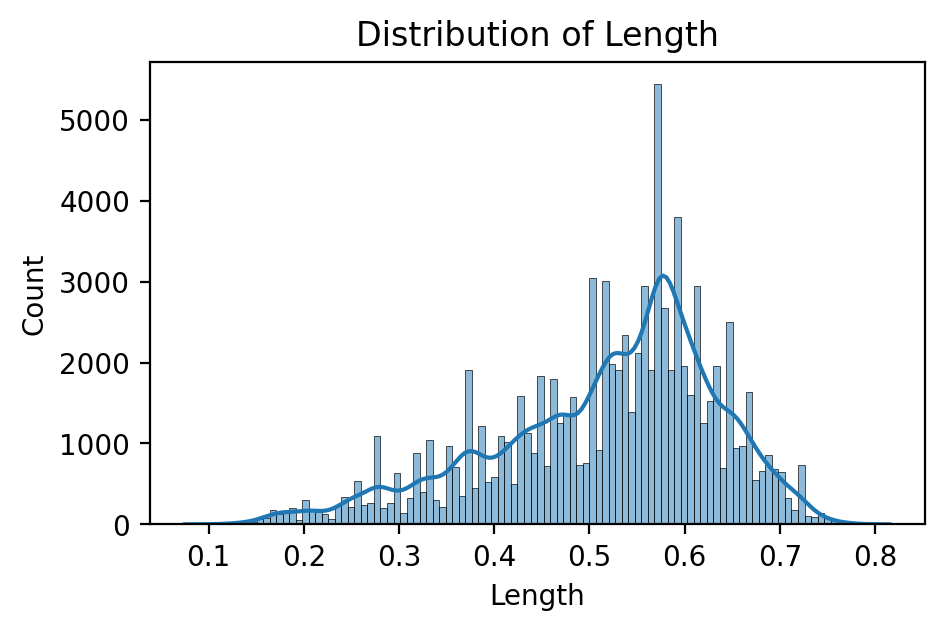

In [11]:
plt.figure(figsize=(5, 3))
sns.histplot(df.Length, kde=True)
plt.title("Distribution of Length")

Text(0.5, 1.0, 'Distribution of Length by Sex')

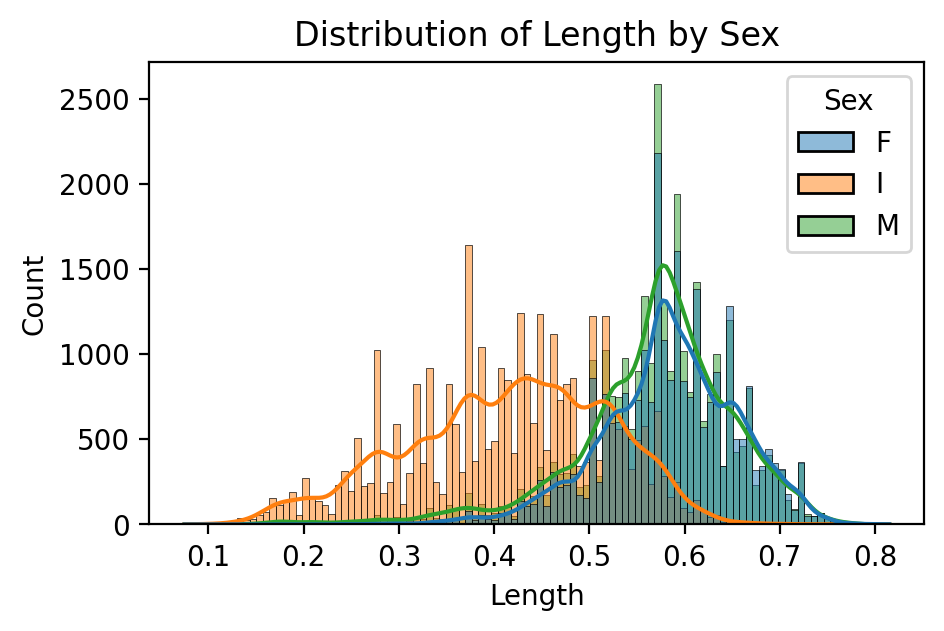

In [12]:
plt.figure(figsize=(5, 3))
sns.histplot(x='Length', kde=True, hue="Sex", data=df)
plt.title("Distribution of Length by Sex")

Text(0.5, 1.0, 'Regression plot of Length vs Diameter')

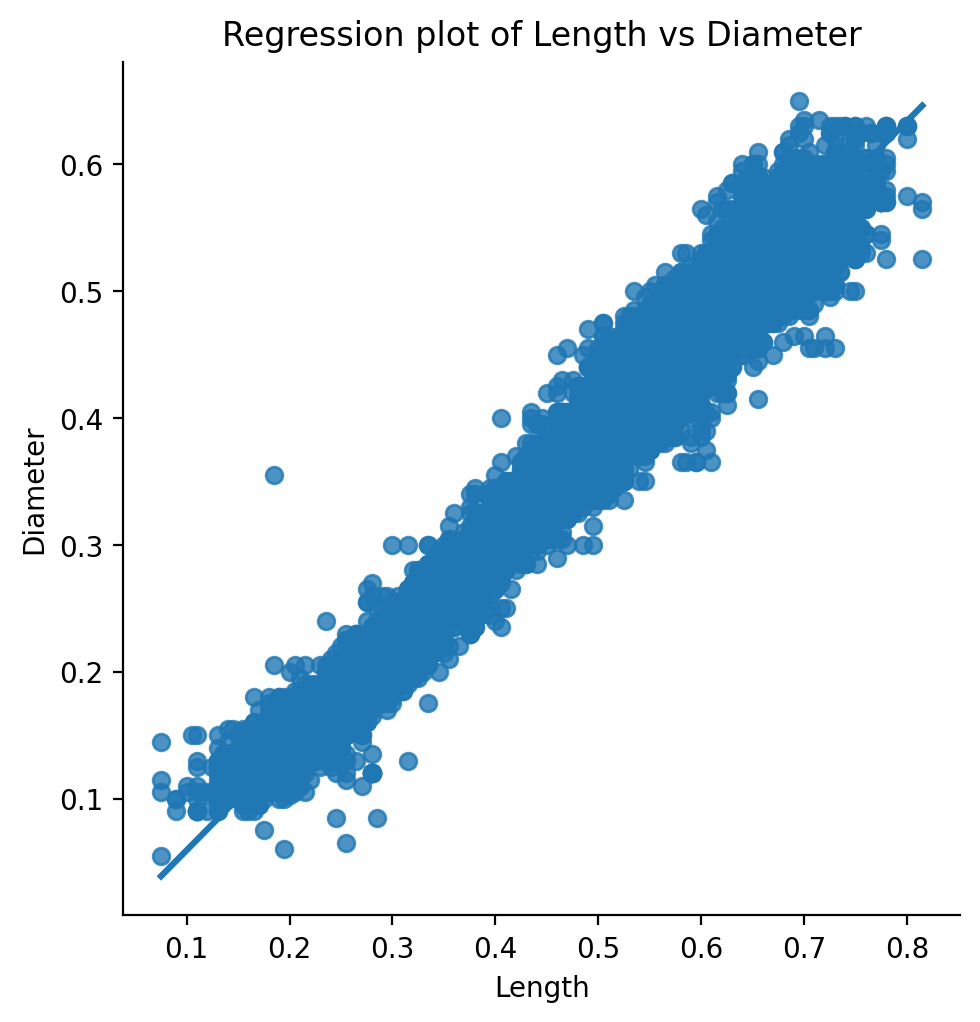

In [13]:
sns.lmplot(x='Length', y='Diameter', data=df)
plt.title("Regression plot of Length vs Diameter")

Text(0.5, 1.0, 'Regression plot of Whole weight vs Height')

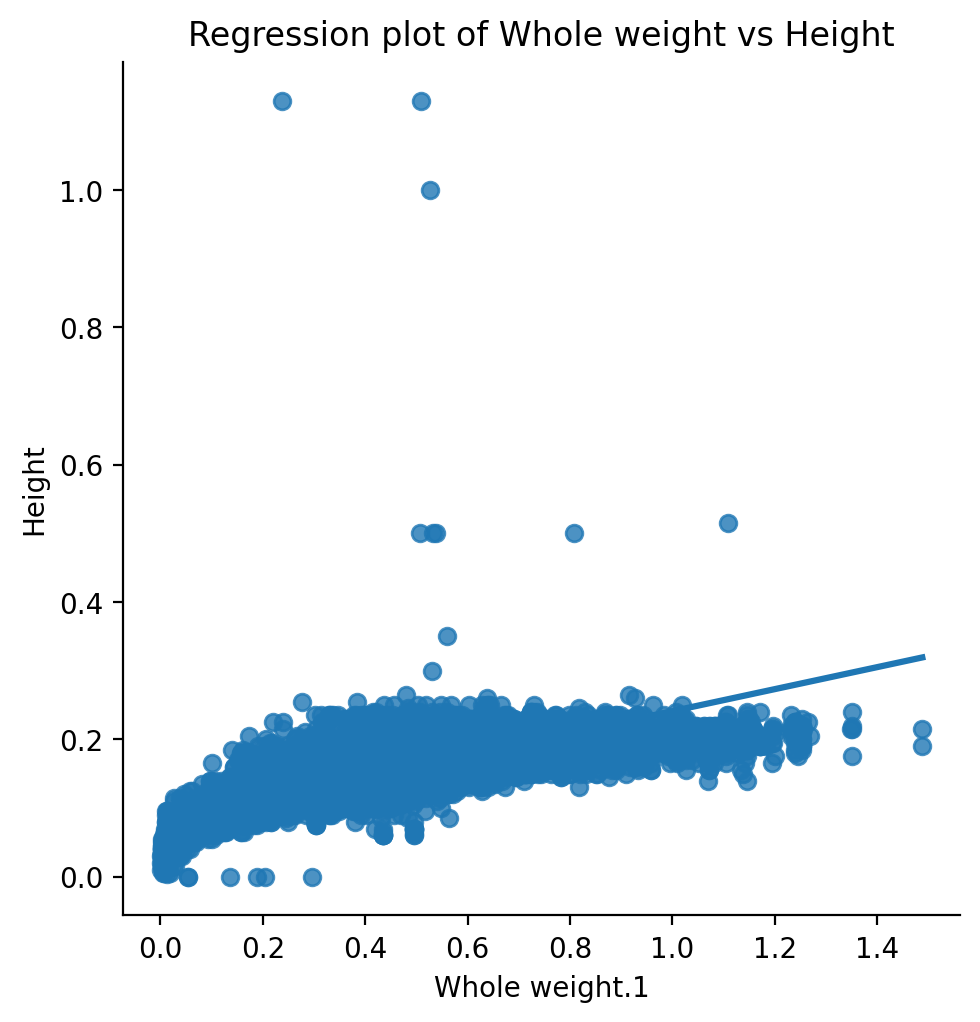

In [14]:
sns.lmplot(x='Whole weight.1', y='Height', data=df)
plt.title("Regression plot of Whole weight vs Height")

<Axes: xlabel='Rings', ylabel='Shell weight'>

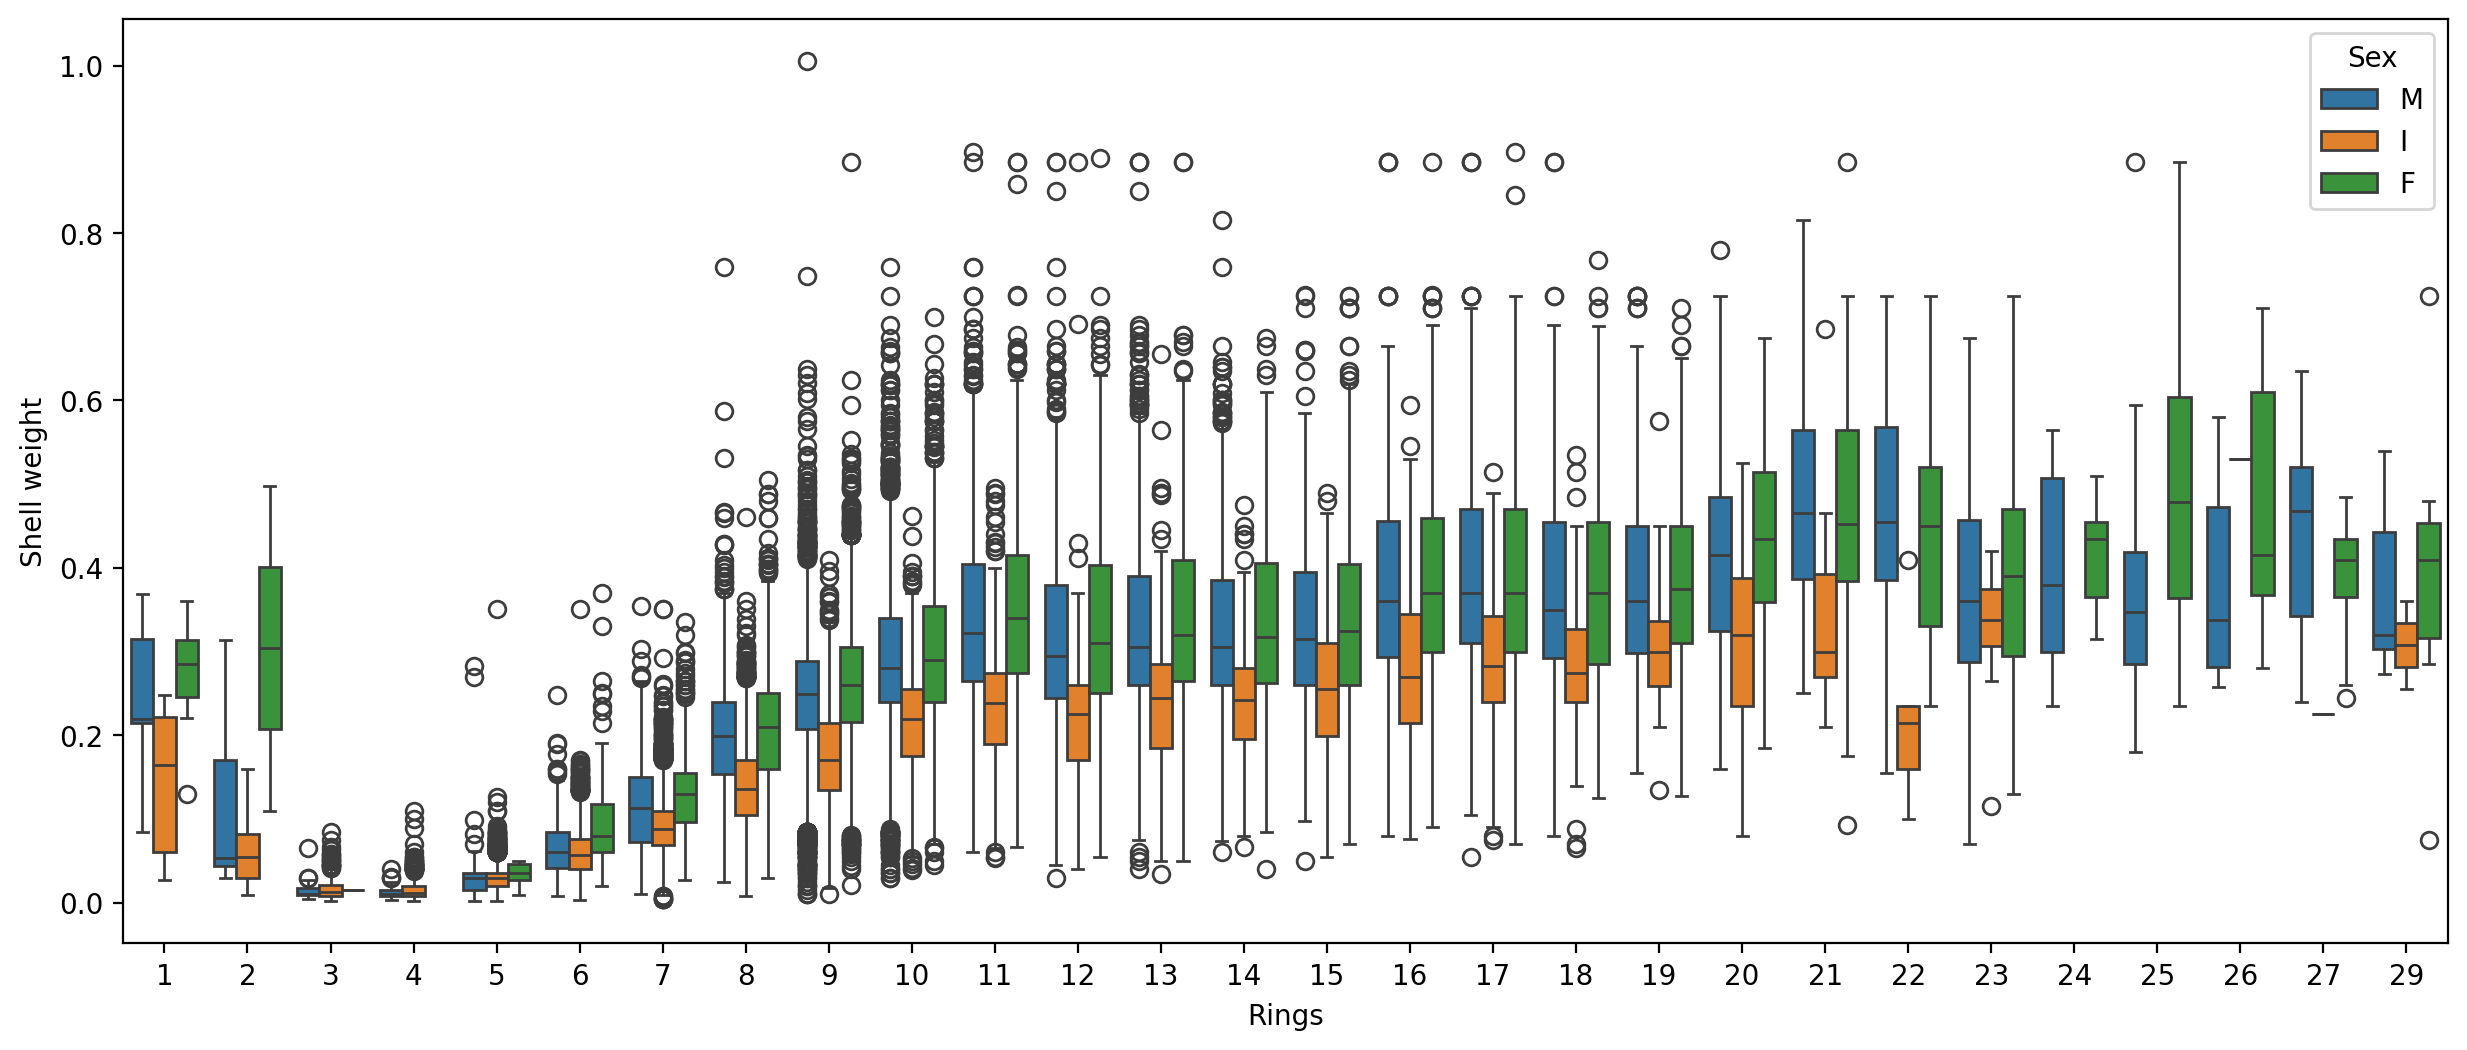

In [15]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Rings', y='Shell weight' ,data=df, hue='Sex')

<Axes: >

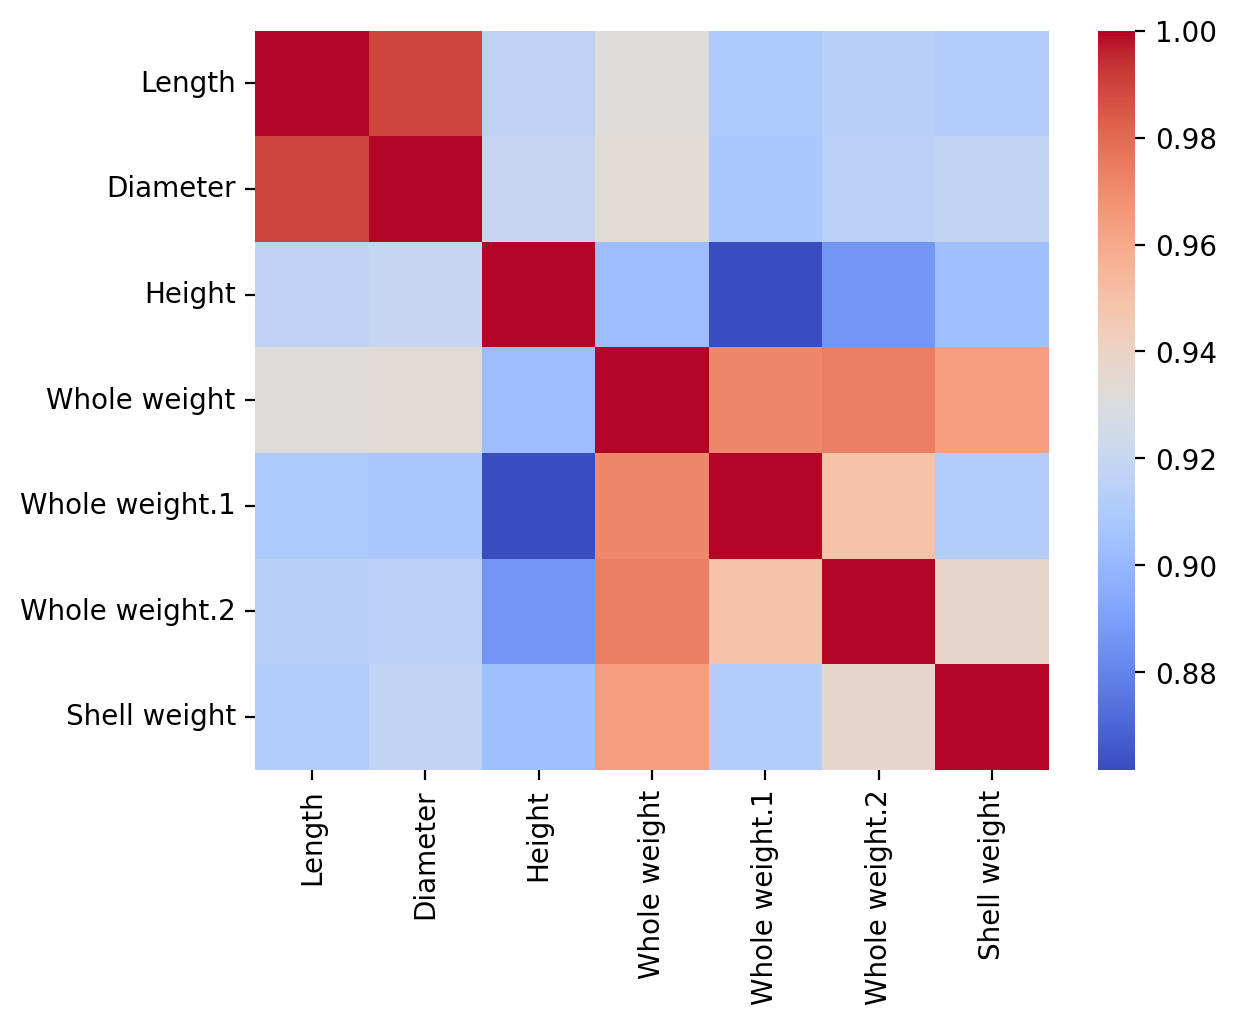

In [16]:
corr_df = df.select_dtypes(float).corr()
sns.heatmap(corr_df, cmap="coolwarm")

Convert "sex" variable to a numeric format by using one-hot-encoding.  

Hint: You can make use of sklearn.preprocessing.OneHotEncoder() and sklearn.compose.make_colum_transformer()

In [17]:
import sklearn
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [18]:
ohe = OneHotEncoder(sparse_output=False)
ct = make_column_transformer(
        (ohe, ['Sex']),
        remainder='passthrough', verbose_feature_names_out=False)

In [19]:
ct.fit(df)
transformed = ct.transform(df)

In [20]:
# transformating back into a dataframe
df = pd.DataFrame(transformed, columns=ct.get_feature_names_out())
df.head()

,Sex_F,Sex_I,Sex_M,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,1.0,0.0,0.0,0.0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11.0
1,1.0,0.0,0.0,1.0,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11.0
2,0.0,1.0,0.0,2.0,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6.0
3,0.0,0.0,1.0,3.0,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10.0
4,0.0,1.0,0.0,4.0,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9.0


Create proper X and y datasets.  
You will need to drop 2 columns from df to get X. What are they?  


Columns to be dropped:  
1.   column name
2.   column name

In [21]:
X = df.drop(['id', 'Rings'], axis=1)
X.head()

,Sex_F,Sex_I,Sex_M,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,1.0,0.0,0.0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400
1,1.0,0.0,0.0,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200
2,0.0,1.0,0.0,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050
3,0.0,0.0,1.0,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500
4,0.0,1.0,0.0,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975


In [22]:
y = df['Rings']
y.head()

0    11.0
1    11.0
2     6.0
3    10.0
4     9.0
Name: Rings, dtype: float64

In [23]:
y.unique()

array([11.,  6., 10.,  9.,  4.,  8., 15.,  7., 12., 20., 17., 13., 14.,
        5., 23.,  3., 22., 16., 18., 19., 21., 25.,  1., 29.,  2., 27.,
       24., 26.])

In [24]:
n_cols = X.shape[1]
n_cols

10

In [25]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=0, stratify=y, test_size=0.30)

#### Building neural network models

Note: By default, each Dense layer added will include a bias term that will be connected from previous layer to the added layer (The `use_bias=True` parameter). Do not change this behavior.

NOTE: Repeat questions **part a** and **part b** at least 3 times and measure the average performance, average time spent, etc. to answer some of these questions.
- Create a table of results and populate it after each run.  

### Q 3.a.
- Build a neural network with two hidden layers, 10 neurons each.
- We will not have any activation functions.
- How many weights are there that connect the input layer to the hidden layer?
- How many weights are there that connect the 1st hidden layer to the 2nd hidden layer?
- How many weights need to be learned in total by the model?

In [26]:
import time

In [27]:
final_results_df = pd.DataFrame()

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Iteration 1
Train r2 0.6031768770409338
Test r2 0.6031102616224511


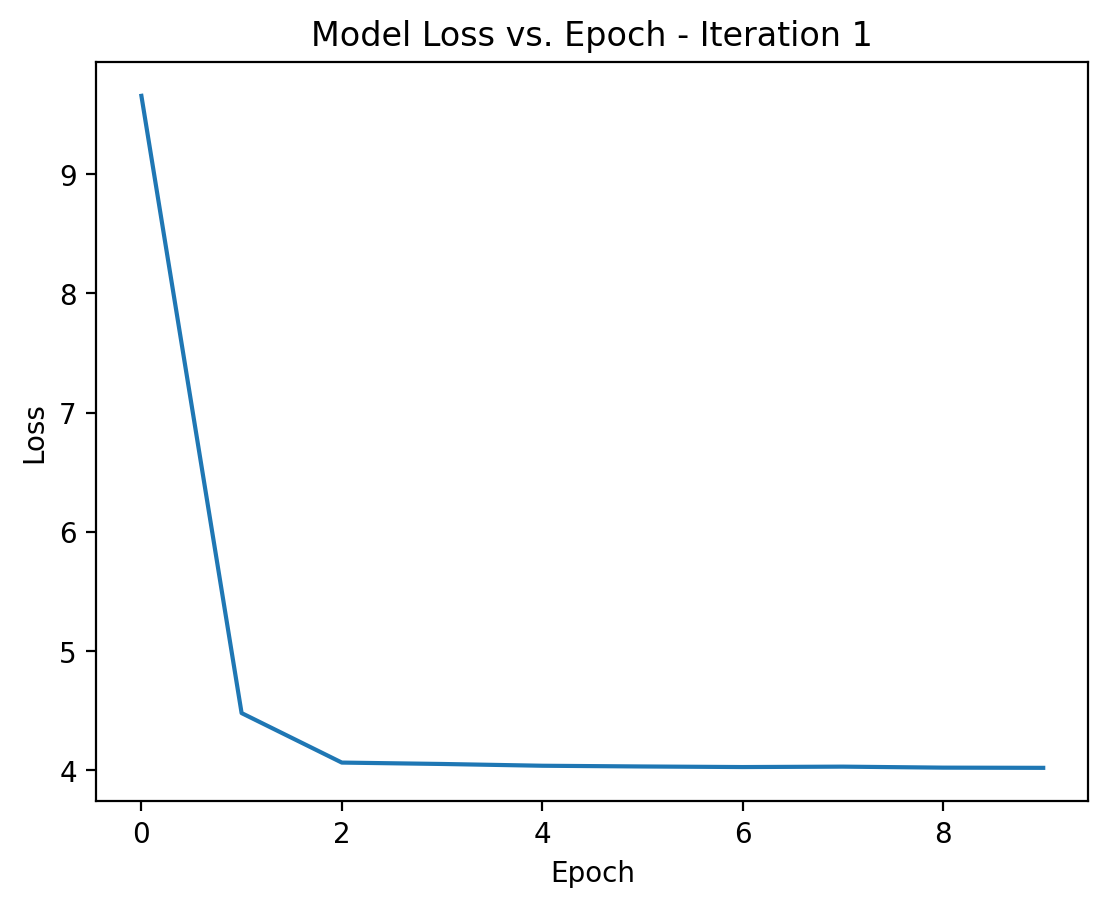

Iteration 2
Train r2 0.6027710359819995
Test r2 0.601990291941406


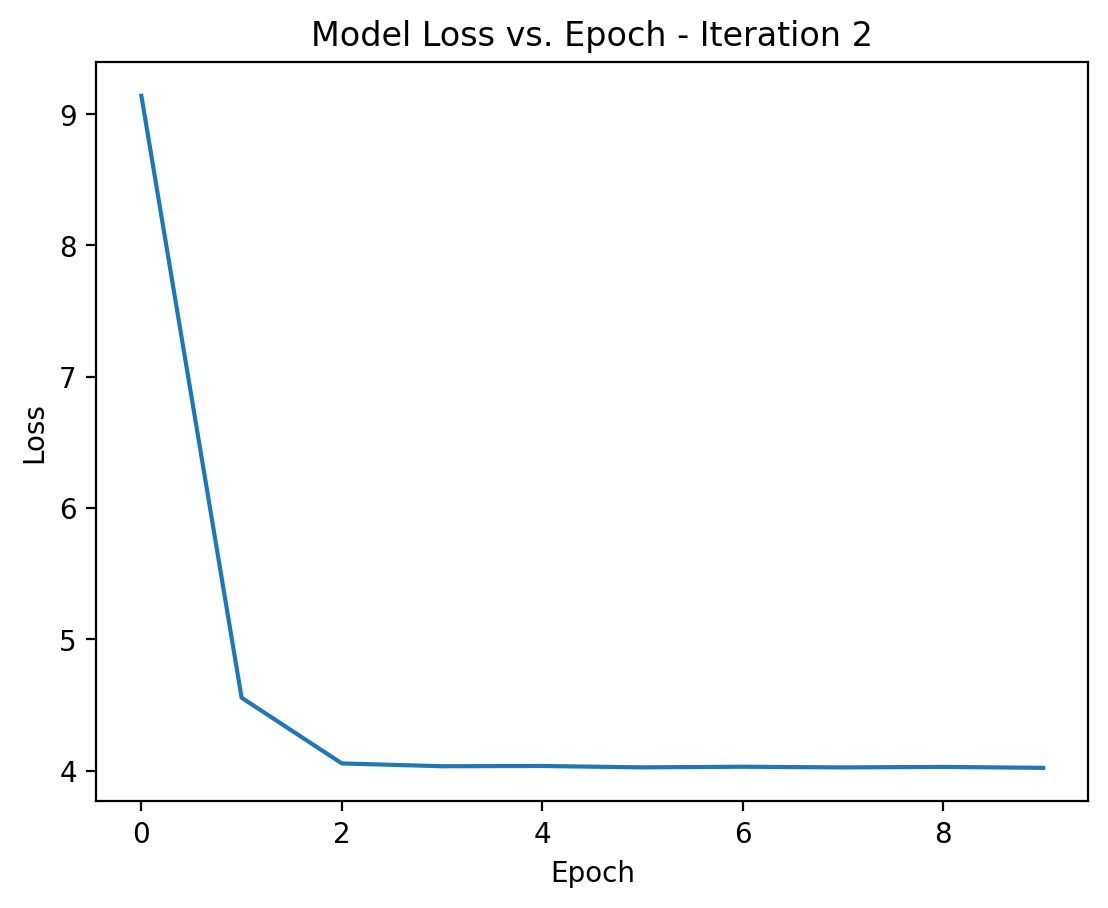

Iteration 3
Train r2 0.6039133123103058
Test r2 0.6033931071055805


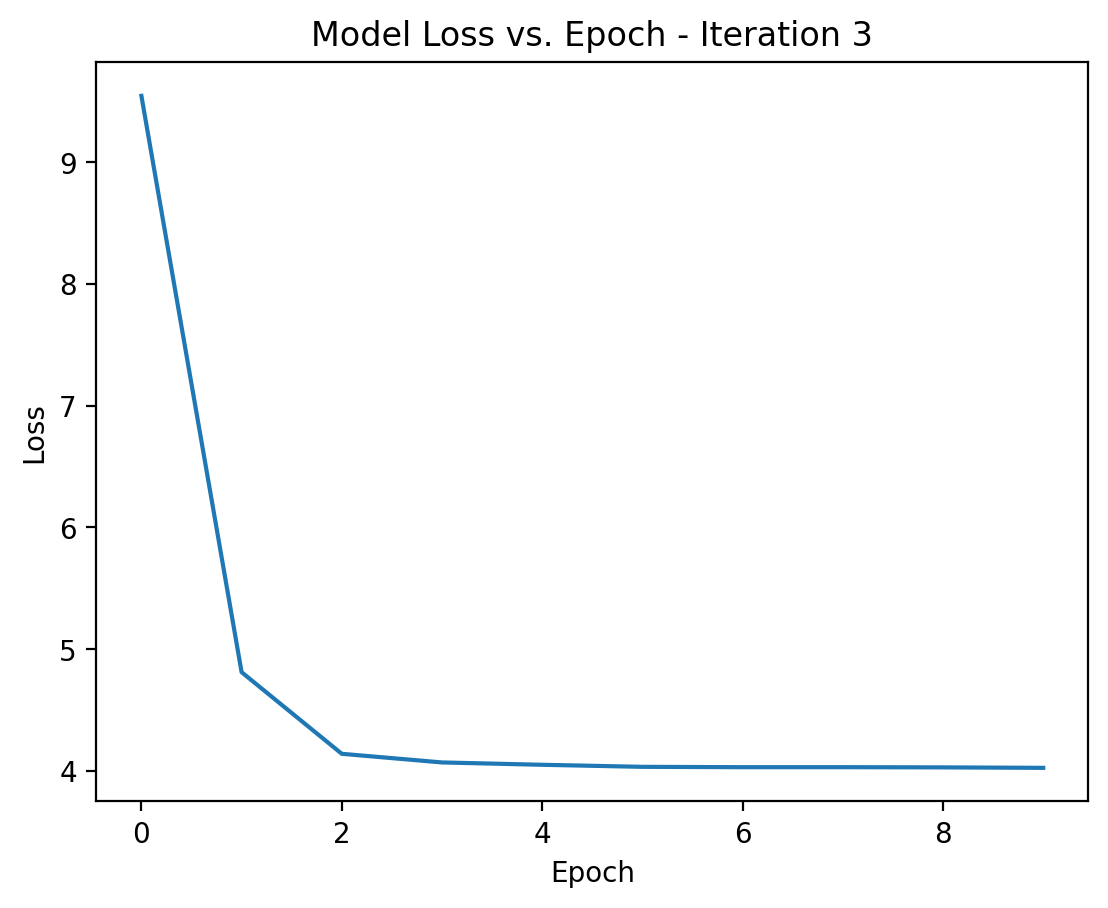

In [29]:
for i in range(3):
  print(f"Iteration {i+1}")
  model = Sequential()
  model.add(Dense(units=10, use_bias=True, input_shape=(n_cols,)))
  model.add(Dense(units=10, use_bias=True))
  model.add(Dense(units=1, use_bias=True))
  start_time = time.time()
  model.compile(optimizer='adam', loss='mean_squared_error')
  history = model.fit(X_train, y_train, epochs=10, verbose=0)
  end_time = time.time()
  train_r2 = metrics.r2_score(y_train, model.predict(X_train, verbose=0))
  test_r2 = metrics.r2_score(y_test, model.predict(X_test, verbose=0))
  print("Train r2", train_r2)
  print("Test r2", test_r2)
  raw_results = pd.DataFrame([{'Model_specs': 'NN 2 hidden 10 neuron each no activation function',
                               'iteration':i+1,
                               'train_r2': train_r2,
                               'test_r2': test_r2,
                               'elapsed_time':end_time - start_time,
                               'timestamp':end_time}])
  final_results_df = pd.concat([final_results_df, raw_results], ignore_index = True)
  plt.plot(history.history['loss'])
  plt.title(f'Model Loss vs. Epoch - Iteration {i+1}')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.show()

In [30]:
final_results_df.sort_values("timestamp", ascending=False).head(6)

,Model_specs,iteration,train_r2,test_r2,elapsed_time,timestamp
2,NN 2 hidden 10 neuron each no activation function,3,0.603913,0.603393,41.693120,1.715139e+09
1,NN 2 hidden 10 neuron each no activation function,2,0.602771,0.601990,28.663390,1.715138e+09
0,NN 2 hidden 10 neuron each no activation function,1,0.603177,0.603110,42.151266,1.715138e+09


Number of weights connecting the input layer to the first hidden layer:

Number of weights = 10 * 10 = 100 + 10(bias) = 110

Number of weights connecting the first hidden layer to the second hidden layer:

Number of weights = 10 * 10 = 100 + 10(bias) = 110

Number of weights connecting the second hidden layer to the output layer:

Number of weights = 10 * 1 = 10 + 1(bias) = 11


Total number of weights = 110 + 110 + 11
Total number of weights = 231



### Q 3.b.
- Compile the model:  
    - otimizer='adam'
    - loss='mean_squared_error'  
- Fit the model:
    - epochs=20  
    - verbose=1
    - Do not change the `batch_size` parameter value
- Plot the loss vs epoch
- Make predictions on the training and test sets  
- What is the $R^2$ score for training and test sets?
- Measure the time spent for training.
    - How long does it take to train the model? You can use the `time` package
    - Start timer before compile and stop after fitting
    - How long does each epoch take on average?


In [31]:
import time

Iteration 1
Epoch 1/20
1983/1983 [==============================] - 4s 2ms/step - loss: 9.5491
Epoch 2/20
1983/1983 [==============================] - 3s 2ms/step - loss: 4.5585
Epoch 3/20
1983/1983 [==============================] - 4s 2ms/step - loss: 4.1195
Epoch 4/20
1983/1983 [==============================] - 3s 2ms/step - loss: 4.0356
Epoch 5/20
1983/1983 [==============================] - 3s 2ms/step - loss: 3.9880
Epoch 6/20
1983/1983 [==============================] - 3s 2ms/step - loss: 3.9442
Epoch 7/20
1983/1983 [==============================] - 5s 2ms/step - loss: 3.8876
Epoch 8/20
1983/1983 [==============================] - 3s 2ms/step - loss: 3.8552
Epoch 9/20
1983/1983 [==============================] - 3s 2ms/step - loss: 3.8332
Epoch 10/20
1983/1983 [==============================] - 3s 2ms/step - loss: 3.8122
Epoch 11/20
1983/1983 [==============================] - 5s 2ms/step - loss: 3.7924
Epoch 12/20
1983/1983 [==============================] - 3s 2ms/step - lo

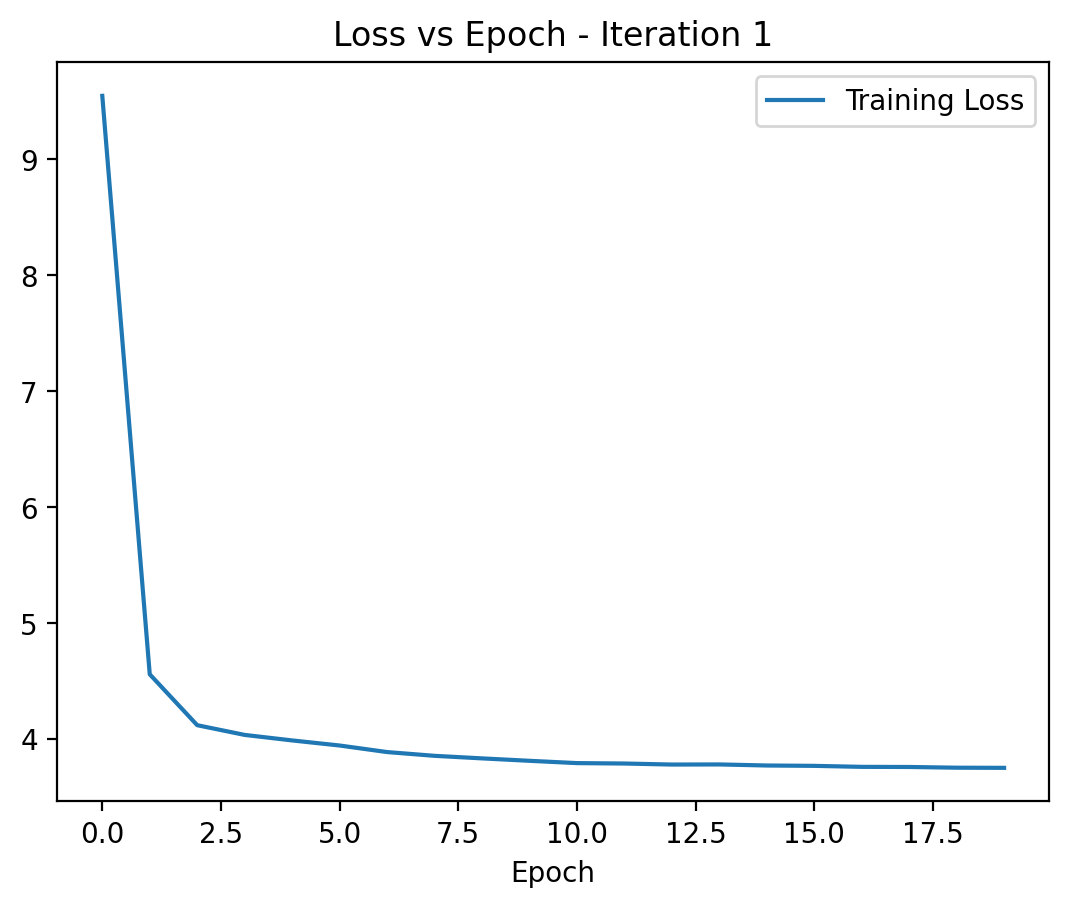

Iteration 2
Epoch 1/20
1983/1983 [==============================] - 5s 2ms/step - loss: 9.9704
Epoch 2/20
1983/1983 [==============================] - 3s 2ms/step - loss: 4.7899
Epoch 3/20
1983/1983 [==============================] - 3s 2ms/step - loss: 4.0571
Epoch 4/20
1983/1983 [==============================] - 4s 2ms/step - loss: 3.9331
Epoch 5/20
1983/1983 [==============================] - 4s 2ms/step - loss: 3.8851
Epoch 6/20
1983/1983 [==============================] - 3s 2ms/step - loss: 3.8691
Epoch 7/20
1983/1983 [==============================] - 3s 2ms/step - loss: 3.8572
Epoch 8/20
1983/1983 [==============================] - 4s 2ms/step - loss: 3.8507
Epoch 9/20
1983/1983 [==============================] - 4s 2ms/step - loss: 3.8467
Epoch 10/20
1983/1983 [==============================] - 3s 2ms/step - loss: 3.8393
Epoch 11/20
1983/1983 [==============================] - 3s 2ms/step - loss: 3.8403
Epoch 12/20
1983/1983 [==============================] - 4s 2ms/step - lo

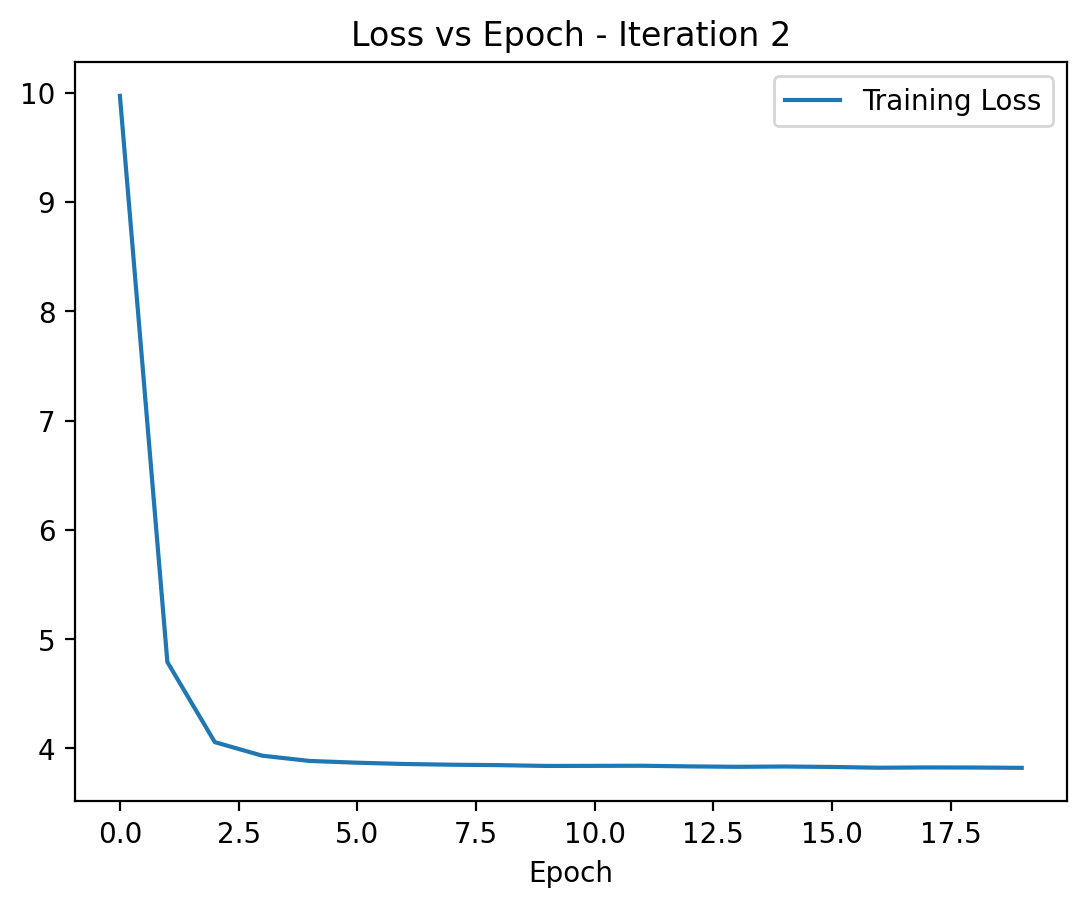

Iteration 3
Epoch 1/20
1983/1983 [==============================] - 4s 2ms/step - loss: 10.2341
Epoch 2/20
1983/1983 [==============================] - 3s 2ms/step - loss: 4.5331
Epoch 3/20
1983/1983 [==============================] - 5s 2ms/step - loss: 4.0422
Epoch 4/20
1983/1983 [==============================] - 4s 2ms/step - loss: 3.9881
Epoch 5/20
1983/1983 [==============================] - 3s 2ms/step - loss: 3.9624
Epoch 6/20
1983/1983 [==============================] - 3s 2ms/step - loss: 3.9458
Epoch 7/20
1983/1983 [==============================] - 5s 2ms/step - loss: 3.9338
Epoch 8/20
1983/1983 [==============================] - 3s 2ms/step - loss: 3.9248
Epoch 9/20
1983/1983 [==============================] - 3s 2ms/step - loss: 3.9227
Epoch 10/20
1983/1983 [==============================] - 3s 2ms/step - loss: 3.9113
Epoch 11/20
1983/1983 [==============================] - 5s 2ms/step - loss: 3.9169
Epoch 12/20
1983/1983 [==============================] - 3s 2ms/step - l

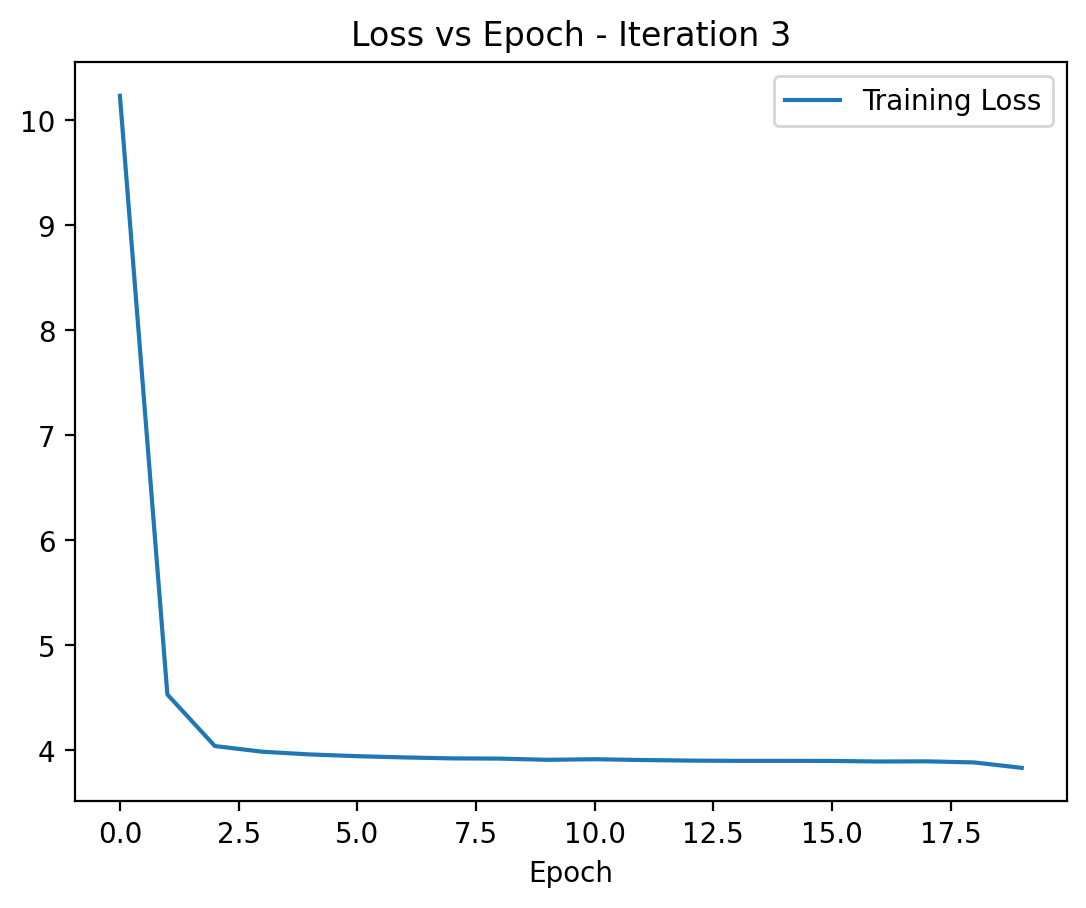

In [32]:
for i in range(3):
  print(f"Iteration {i+1}")
  model = Sequential()
  model.add(Dense(units=10, use_bias=True, activation='relu', input_shape=(n_cols,)))
  model.add(Dense(units=10, use_bias=True))
  model.add(Dense(units=1, use_bias=True))
  start_time = time.time()
  model.compile(optimizer='adam', loss='mean_squared_error')
  history = model.fit(X_train, y_train,
                      epochs=20,
                      verbose=1)
  end_time = time.time()
  train_r2 = metrics.r2_score(y_train, model.predict(X_train, verbose=0))
  test_r2 = metrics.r2_score(y_test, model.predict(X_test, verbose=0))
  print("Train r2", train_r2)
  print("Test r2", test_r2)
  raw_results = pd.DataFrame([{'Model_specs': 'NN 2 hidden 10 neuron each relu activation 20 epoch default batch size',
                               'iteration':i+1,
                               'train_r2': train_r2,
                               'test_r2': test_r2,
                               'elapsed_time':end_time - start_time,
                               'timestamp':end_time}])
  final_results_df = pd.concat([final_results_df, raw_results], ignore_index = True)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.xlabel('Epoch')
  plt.title(f'Loss vs Epoch - Iteration {i+1}')
  plt.legend()
  plt.show()


In [33]:
final_results_df.sort_values("timestamp", ascending=False).head(6)

,Model_specs,iteration,train_r2,test_r2,elapsed_time,timestamp
5,NN 2 hidden 10 neuron each relu activation 20 ...,3,0.622644,0.622950,73.177495,1.715139e+09
4,NN 2 hidden 10 neuron each relu activation 20 ...,2,0.622490,0.621584,82.910604,1.715139e+09
3,NN 2 hidden 10 neuron each relu activation 20 ...,1,0.630023,0.630225,73.711418,1.715139e+09
2,NN 2 hidden 10 neuron each no activation function,3,0.603913,0.603393,41.693120,1.715139e+09
1,NN 2 hidden 10 neuron each no activation function,2,0.602771,0.601990,28.663390,1.715138e+09
0,NN 2 hidden 10 neuron each no activation function,1,0.603177,0.603110,42.151266,1.715138e+09


### Q 4.a.
- Build a neural network with two hidden layers, 10 neurons each.
- We will not apply any activation functions.

Iteration 1
Epoch 1/20
1983/1983 [==============================] - 5s 2ms/step - loss: 8.3705
Epoch 2/20
1983/1983 [==============================] - 3s 2ms/step - loss: 4.6608
Epoch 3/20
1983/1983 [==============================] - 3s 2ms/step - loss: 4.0979
Epoch 4/20
1983/1983 [==============================] - 3s 2ms/step - loss: 4.0499
Epoch 5/20
1983/1983 [==============================] - 4s 2ms/step - loss: 4.0410
Epoch 6/20
1983/1983 [==============================] - 3s 2ms/step - loss: 4.0350
Epoch 7/20
1983/1983 [==============================] - 3s 2ms/step - loss: 4.0266
Epoch 8/20
1983/1983 [==============================] - 4s 2ms/step - loss: 4.0257
Epoch 9/20
1983/1983 [==============================] - 5s 3ms/step - loss: 4.0268
Epoch 10/20
1983/1983 [==============================] - 4s 2ms/step - loss: 4.0299
Epoch 11/20
1983/1983 [==============================] - 3s 2ms/step - loss: 4.0221
Epoch 12/20
1983/1983 [==============================] - 3s 2ms/step - lo

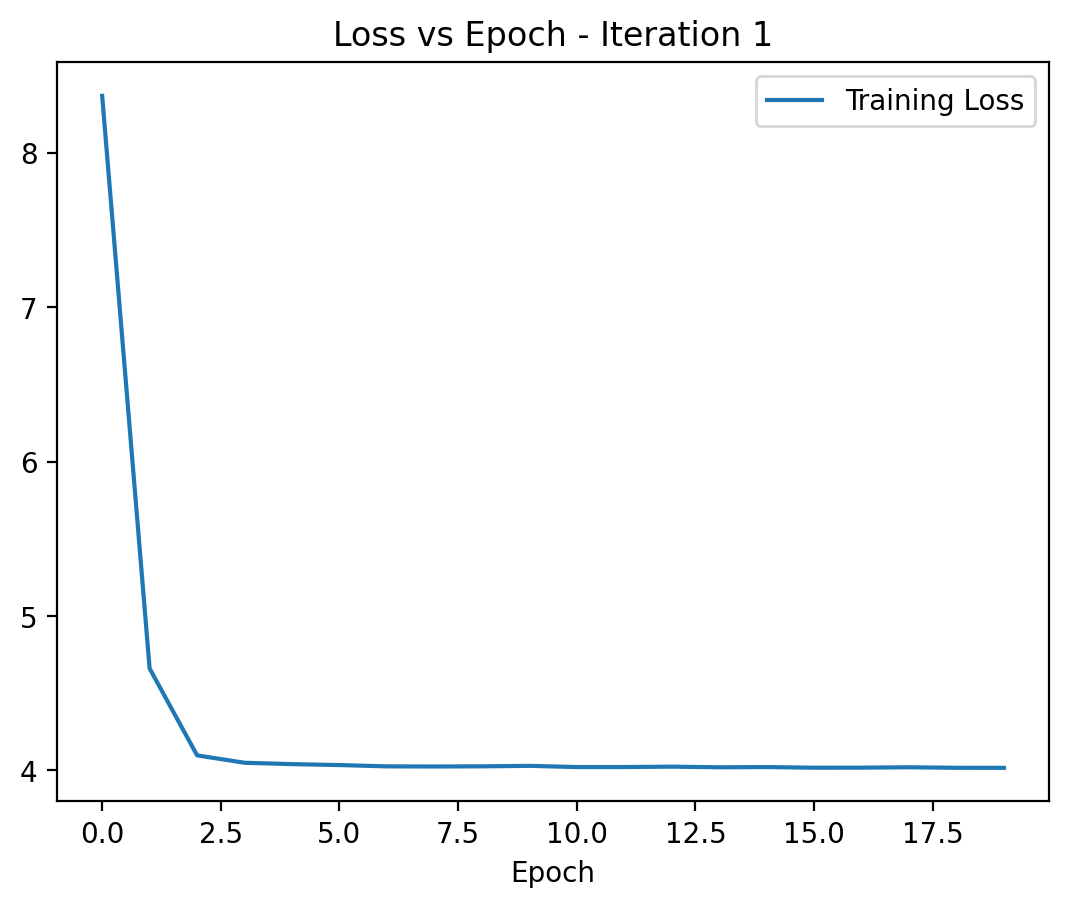

Iteration 2
Epoch 1/20
1983/1983 [==============================] - 4s 2ms/step - loss: 9.9427
Epoch 2/20
1983/1983 [==============================] - 3s 2ms/step - loss: 4.4803
Epoch 3/20
1983/1983 [==============================] - 5s 2ms/step - loss: 4.0516
Epoch 4/20
1983/1983 [==============================] - 3s 2ms/step - loss: 4.0435
Epoch 5/20
1983/1983 [==============================] - 3s 2ms/step - loss: 4.0283
Epoch 6/20
1983/1983 [==============================] - 4s 2ms/step - loss: 4.0273
Epoch 7/20
1983/1983 [==============================] - 4s 2ms/step - loss: 4.0312
Epoch 8/20
1983/1983 [==============================] - 3s 2ms/step - loss: 4.0259
Epoch 9/20
1983/1983 [==============================] - 3s 2ms/step - loss: 4.0223
Epoch 10/20
1983/1983 [==============================] - 4s 2ms/step - loss: 4.0165
Epoch 11/20
1983/1983 [==============================] - 4s 2ms/step - loss: 4.0248
Epoch 12/20
1983/1983 [==============================] - 3s 2ms/step - lo

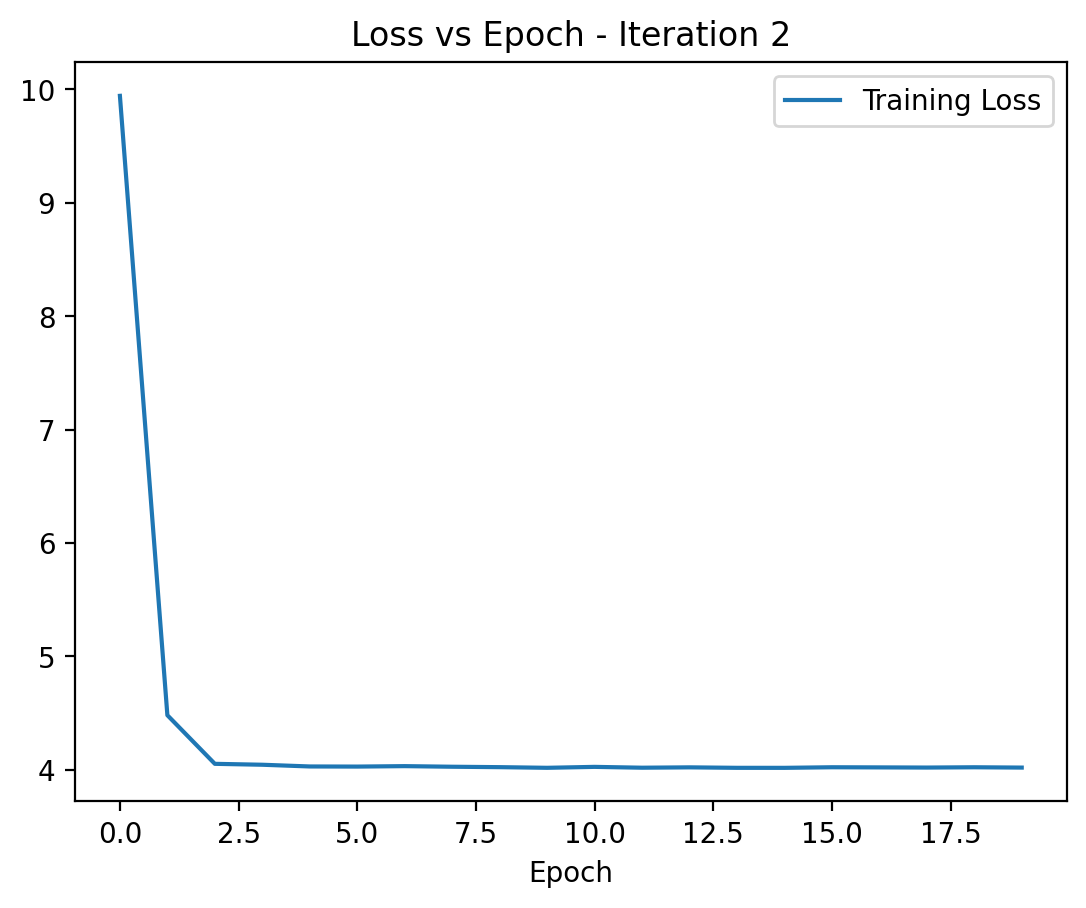

Iteration 3
Epoch 1/20
1983/1983 [==============================] - 5s 2ms/step - loss: 9.5043
Epoch 2/20
1983/1983 [==============================] - 3s 2ms/step - loss: 5.0554
Epoch 3/20
1983/1983 [==============================] - 3s 2ms/step - loss: 4.1530
Epoch 4/20
1983/1983 [==============================] - 4s 2ms/step - loss: 4.0336
Epoch 5/20
1983/1983 [==============================] - 4s 2ms/step - loss: 4.0347
Epoch 6/20
1983/1983 [==============================] - 3s 2ms/step - loss: 4.0339
Epoch 7/20
1983/1983 [==============================] - 3s 2ms/step - loss: 4.0312
Epoch 8/20
1983/1983 [==============================] - 4s 2ms/step - loss: 4.0259
Epoch 9/20
1983/1983 [==============================] - 4s 2ms/step - loss: 4.0224
Epoch 10/20
1983/1983 [==============================] - 3s 2ms/step - loss: 4.0215
Epoch 11/20
1983/1983 [==============================] - 3s 2ms/step - loss: 4.0172
Epoch 12/20
1983/1983 [==============================] - 4s 2ms/step - lo

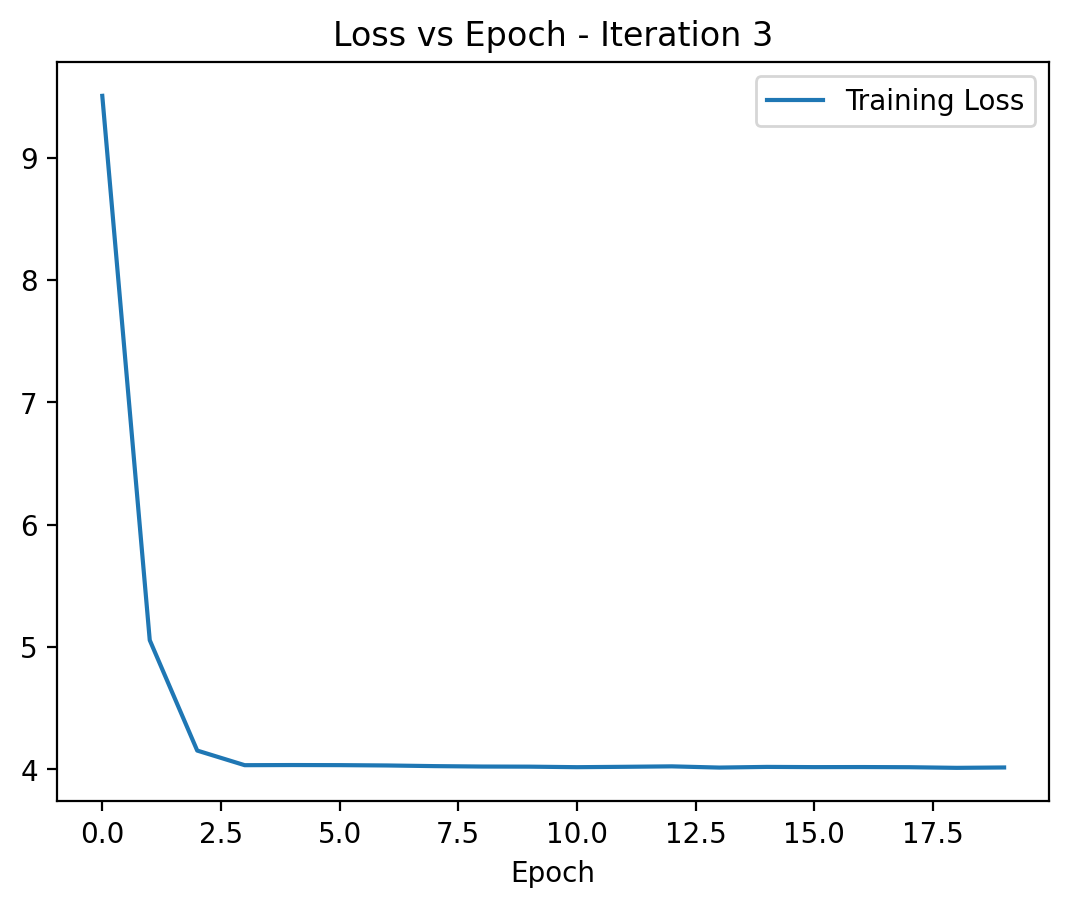

In [34]:
for i in range(3):
  print(f"Iteration {i+1}")
  model = Sequential()
  model.add(Dense(units=10, use_bias=True, input_shape=(n_cols,)))
  model.add(Dense(units=10, use_bias=True))
  model.add(Dense(units=1, use_bias=True))
  start_time = time.time()
  model.compile(optimizer='adam', loss='mean_squared_error')
  history = model.fit(X_train, y_train,
                      epochs=20,
                      verbose=1)
  end_time=time.time()
  train_r2 = metrics.r2_score(y_train, model.predict(X_train, verbose=0))
  test_r2 = metrics.r2_score(y_test, model.predict(X_test, verbose=0))
  print("Train r2", train_r2)
  print("Test r2", test_r2)
  raw_results = pd.DataFrame([{'Model_specs': 'NN 2 hidden 10 neuron each no activation 20 epoch default batch size',
                               'iteration':i+1,
                               'train_r2': train_r2,
                               'test_r2': test_r2,
                               'elapsed_time':end_time - start_time,
                               'timestamp':end_time}])
  final_results_df = pd.concat([final_results_df, raw_results], ignore_index = True)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.xlabel('Epoch')
  plt.title(f'Loss vs Epoch - Iteration {i+1}')
  plt.legend()
  plt.show()

In [35]:
final_results_df.sort_values("timestamp", ascending=False).head(6)

,Model_specs,iteration,train_r2,test_r2,elapsed_time,timestamp
8,NN 2 hidden 10 neuron each no activation 20 ep...,3,0.604015,0.603139,75.076602,1.715139e+09
7,NN 2 hidden 10 neuron each no activation 20 ep...,2,0.604754,0.604060,82.626861,1.715139e+09
6,NN 2 hidden 10 neuron each no activation 20 ep...,1,0.605191,0.604549,73.552657,1.715139e+09
5,NN 2 hidden 10 neuron each relu activation 20 ...,3,0.622644,0.622950,73.177495,1.715139e+09
4,NN 2 hidden 10 neuron each relu activation 20 ...,2,0.622490,0.621584,82.910604,1.715139e+09
3,NN 2 hidden 10 neuron each relu activation 20 ...,1,0.630023,0.630225,73.711418,1.715139e+09


### Q 4.b.
- Compile the model:  
    - otimizer='adam'
    - loss='mean_squared_error'  
- Fit the model:
    - epochs=20  
    - verbose=1
    - batch_size=512
- Plot the loss vs epoch
- Make predictions on the training and test sets  
- What is the $R^2$ score for training and test sets?
- Measure the time spent for training.
    - How long does it take to train the model? You can use the `time` package:
    - Start timer before compile and stop after fitting
    - How long does each epoch take on average?
    - Did setting batch size to 512 make the training faster?
    - Did setting batch size to 512 have any impact on model performance ($R^2$)?


In TensorFlow, the batch size is an important parameter that determines the number of samples to process before the model’s weights are updated. It’s a balance between the efficiency of processing multiple samples at once and the memory constraints of your hardware. A larger batch size can lead to faster training, but it requires more memory and may not generalize as well.

Iteration 1
Epoch 1/20
124/124 [==============================] - 1s 2ms/step - loss: 75.2432
Epoch 2/20
124/124 [==============================] - 0s 2ms/step - loss: 9.9880
Epoch 3/20
124/124 [==============================] - 0s 2ms/step - loss: 5.8793
Epoch 4/20
124/124 [==============================] - 0s 2ms/step - loss: 5.7575
Epoch 5/20
124/124 [==============================] - 0s 2ms/step - loss: 5.6975
Epoch 6/20
124/124 [==============================] - 0s 2ms/step - loss: 5.6379
Epoch 7/20
124/124 [==============================] - 0s 2ms/step - loss: 5.5740
Epoch 8/20
124/124 [==============================] - 0s 2ms/step - loss: 5.5022
Epoch 9/20
124/124 [==============================] - 0s 2ms/step - loss: 5.4232
Epoch 10/20
124/124 [==============================] - 0s 2ms/step - loss: 5.3399
Epoch 11/20
124/124 [==============================] - 0s 2ms/step - loss: 5.2498
Epoch 12/20
124/124 [==============================] - 0s 2ms/step - loss: 5.1578
Epoch 13/20


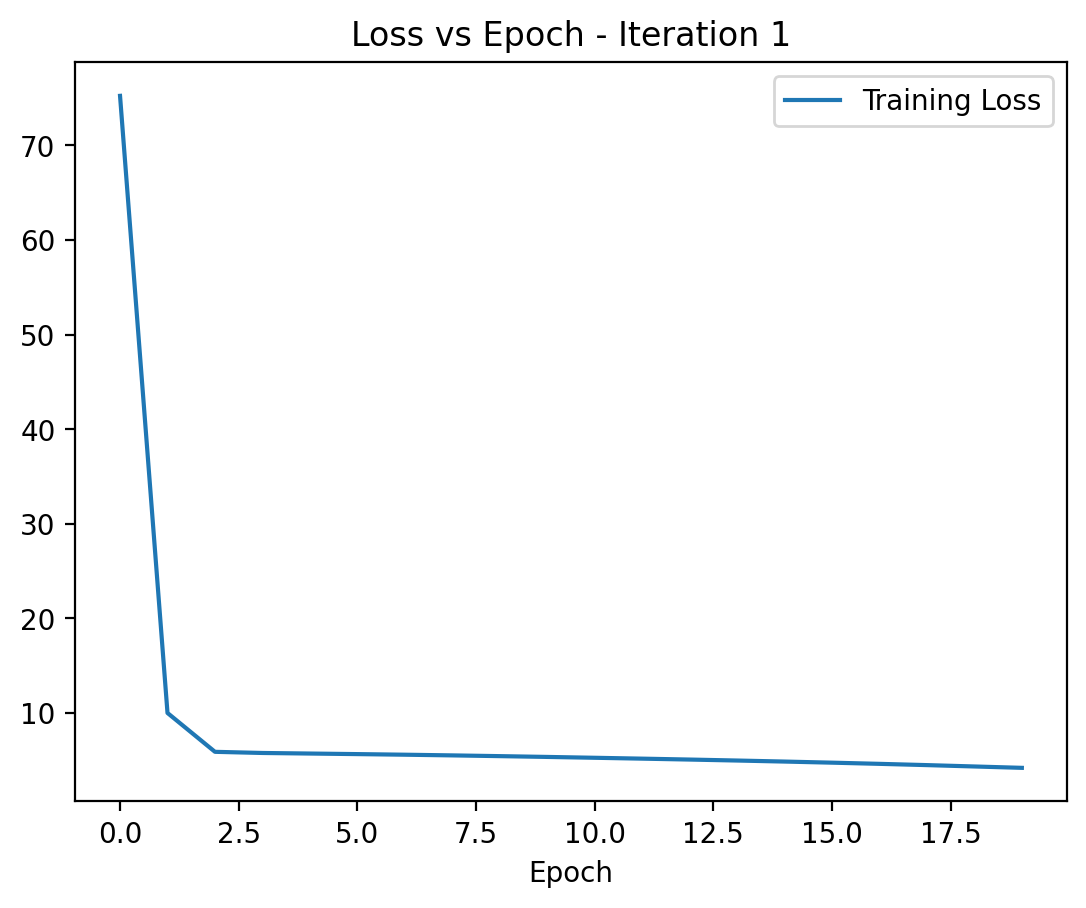

Iteration 2
Epoch 1/20
124/124 [==============================] - 1s 2ms/step - loss: 87.1321
Epoch 2/20
124/124 [==============================] - 0s 2ms/step - loss: 14.7702
Epoch 3/20
124/124 [==============================] - 0s 2ms/step - loss: 6.1052
Epoch 4/20
124/124 [==============================] - 0s 2ms/step - loss: 5.9469
Epoch 5/20
124/124 [==============================] - 0s 2ms/step - loss: 5.8586
Epoch 6/20
124/124 [==============================] - 0s 2ms/step - loss: 5.7834
Epoch 7/20
124/124 [==============================] - 0s 2ms/step - loss: 5.7082
Epoch 8/20
124/124 [==============================] - 0s 2ms/step - loss: 5.6334
Epoch 9/20
124/124 [==============================] - 0s 2ms/step - loss: 5.5590
Epoch 10/20
124/124 [==============================] - 0s 2ms/step - loss: 5.4797
Epoch 11/20
124/124 [==============================] - 0s 2ms/step - loss: 5.3953
Epoch 12/20
124/124 [==============================] - 0s 2ms/step - loss: 5.3059
Epoch 13/20

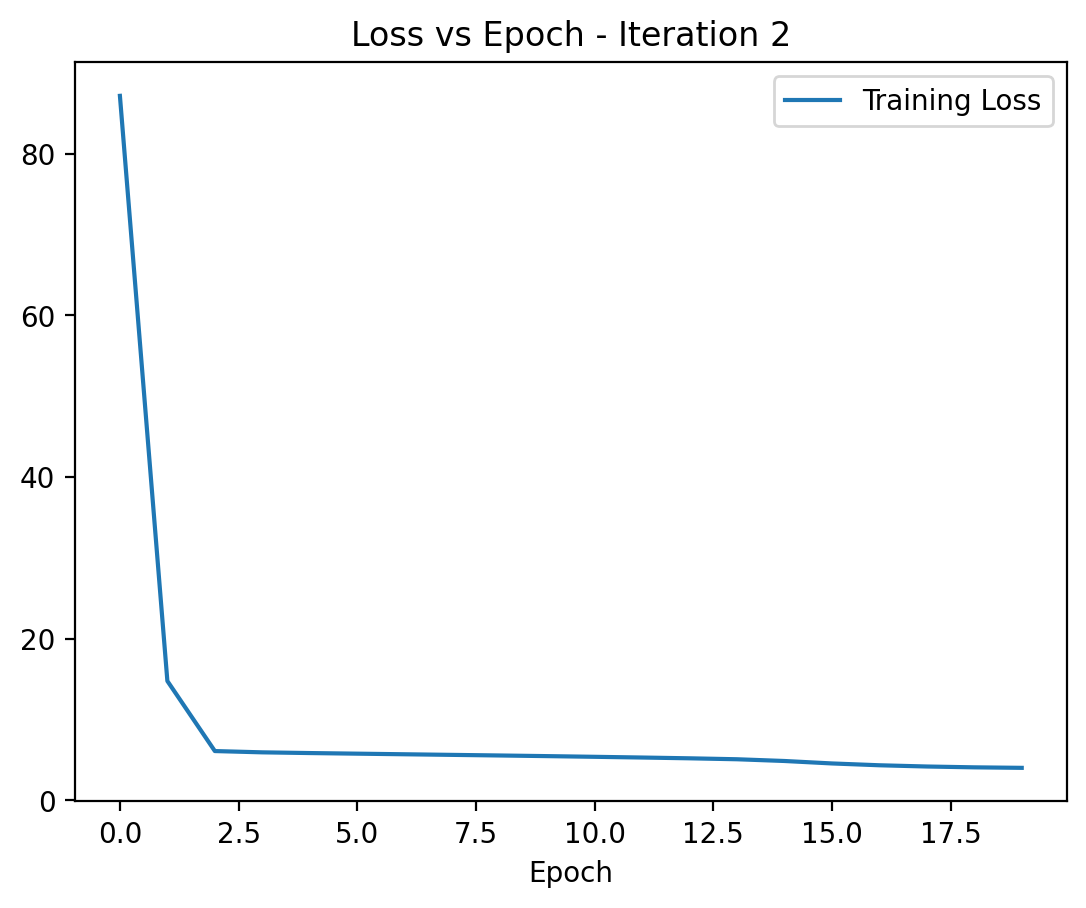

Iteration 3
Epoch 1/20
124/124 [==============================] - 1s 4ms/step - loss: 68.0348
Epoch 2/20
124/124 [==============================] - 0s 3ms/step - loss: 8.0854
Epoch 3/20
124/124 [==============================] - 0s 3ms/step - loss: 6.1666
Epoch 4/20
124/124 [==============================] - 0s 3ms/step - loss: 6.0670
Epoch 5/20
124/124 [==============================] - 0s 3ms/step - loss: 5.9892
Epoch 6/20
124/124 [==============================] - 0s 3ms/step - loss: 5.9152
Epoch 7/20
124/124 [==============================] - 0s 3ms/step - loss: 5.8392
Epoch 8/20
124/124 [==============================] - 0s 3ms/step - loss: 5.7618
Epoch 9/20
124/124 [==============================] - 0s 3ms/step - loss: 5.6804
Epoch 10/20
124/124 [==============================] - 0s 3ms/step - loss: 5.5940
Epoch 11/20
124/124 [==============================] - 0s 2ms/step - loss: 5.5058
Epoch 12/20
124/124 [==============================] - 0s 2ms/step - loss: 5.4146
Epoch 13/20


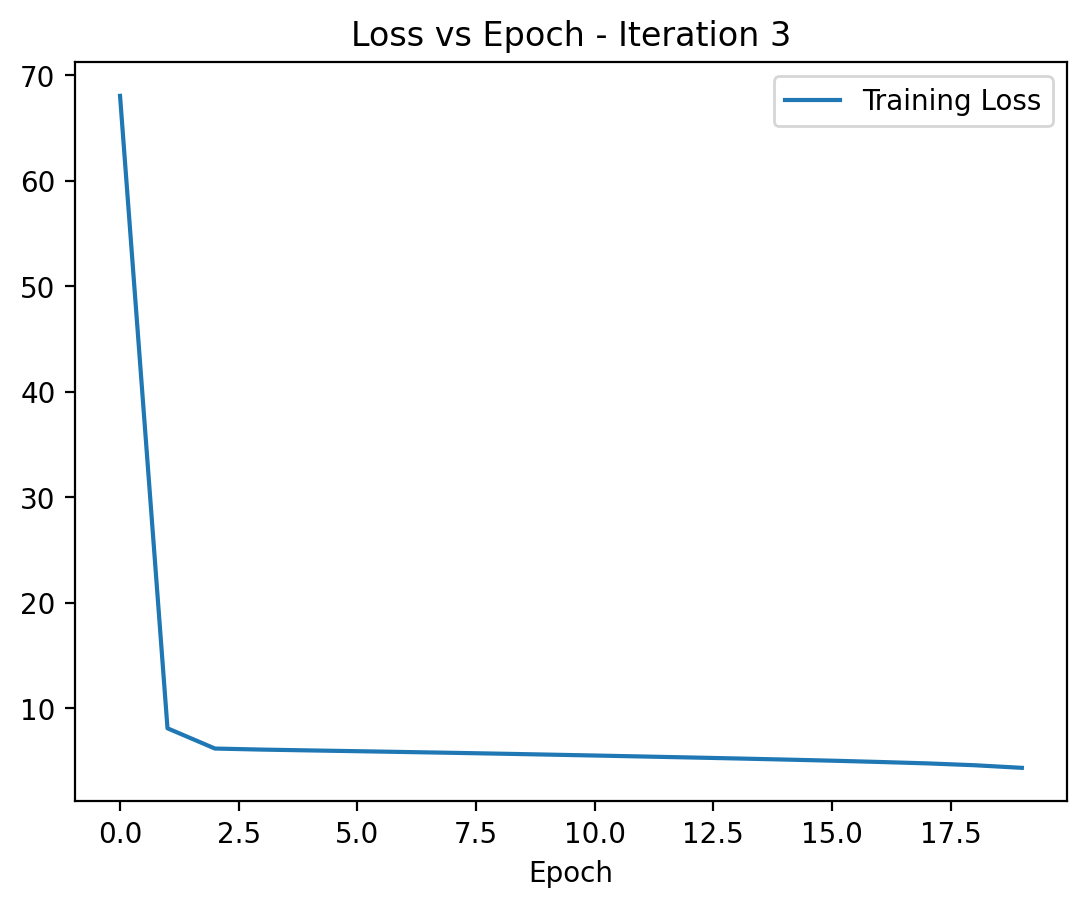

In [36]:
for i in range(3):
  print(f"Iteration {i+1}")
  model = Sequential()
  model.add(Dense(units=10, use_bias=True, activation='relu', input_shape=(n_cols,)))
  model.add(Dense(units=10, use_bias=True))
  model.add(Dense(units=1, use_bias=True))
  start_time = time.time()
  model.compile(optimizer='adam', loss='mean_squared_error')
  history = model.fit(X_train, y_train,
                      epochs=20,
                      verbose=1,
                      batch_size=512)
  end_time = time.time()
  train_r2 = metrics.r2_score(y_train, model.predict(X_train, verbose=0))
  test_r2 = metrics.r2_score(y_test, model.predict(X_test, verbose=0))
  print("Train r2", train_r2)
  print("Test r2", test_r2)
  raw_results = pd.DataFrame([{'Model_specs': 'NN 2 hidden 10 neuron each relu activation 20 epoch 512 batch size',
                               'iteration':i+1,
                               'train_r2': train_r2,
                               'test_r2': test_r2,
                               'elapsed_time':end_time - start_time,
                               'timestamp':end_time}])
  final_results_df = pd.concat([final_results_df, raw_results], ignore_index = True)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.xlabel('Epoch')
  plt.title(f'Loss vs Epoch - Iteration {i+1}')
  plt.legend()
  plt.show()

In [37]:
final_results_df.sort_values("timestamp", ascending=False).head(6)

,Model_specs,iteration,train_r2,test_r2,elapsed_time,timestamp
11,NN 2 hidden 10 neuron each relu activation 20 ...,3,0.581153,0.580550,11.076338,1.715139e+09
10,NN 2 hidden 10 neuron each relu activation 20 ...,2,0.603488,0.603333,5.208359,1.715139e+09
9,NN 2 hidden 10 neuron each relu activation 20 ...,1,0.591610,0.591657,11.254701,1.715139e+09
8,NN 2 hidden 10 neuron each no activation 20 ep...,3,0.604015,0.603139,75.076602,1.715139e+09
7,NN 2 hidden 10 neuron each no activation 20 ep...,2,0.604754,0.604060,82.626861,1.715139e+09
6,NN 2 hidden 10 neuron each no activation 20 ep...,1,0.605191,0.604549,73.552657,1.715139e+09


Setting batch_size to 512 made the training faster. However, the performance of the model did not improve.

### Q 5.a.
- Build a neural network with two hidden layers, 10 neurons each.
- We will not apply any activation functions.

Iteration 1
Epoch 1/20
124/124 [==============================] - 1s 3ms/step - loss: 48.2436
Epoch 2/20
124/124 [==============================] - 0s 3ms/step - loss: 6.6653
Epoch 3/20
124/124 [==============================] - 0s 3ms/step - loss: 6.0132
Epoch 4/20
124/124 [==============================] - 0s 3ms/step - loss: 5.8749
Epoch 5/20
124/124 [==============================] - 0s 2ms/step - loss: 5.7848
Epoch 6/20
124/124 [==============================] - 0s 2ms/step - loss: 5.7042
Epoch 7/20
124/124 [==============================] - 0s 2ms/step - loss: 5.6300
Epoch 8/20
124/124 [==============================] - 0s 2ms/step - loss: 5.5606
Epoch 9/20
124/124 [==============================] - 0s 2ms/step - loss: 5.4958
Epoch 10/20
124/124 [==============================] - 0s 2ms/step - loss: 5.4299
Epoch 11/20
124/124 [==============================] - 0s 2ms/step - loss: 5.3673
Epoch 12/20
124/124 [==============================] - 0s 2ms/step - loss: 5.2965
Epoch 13/20


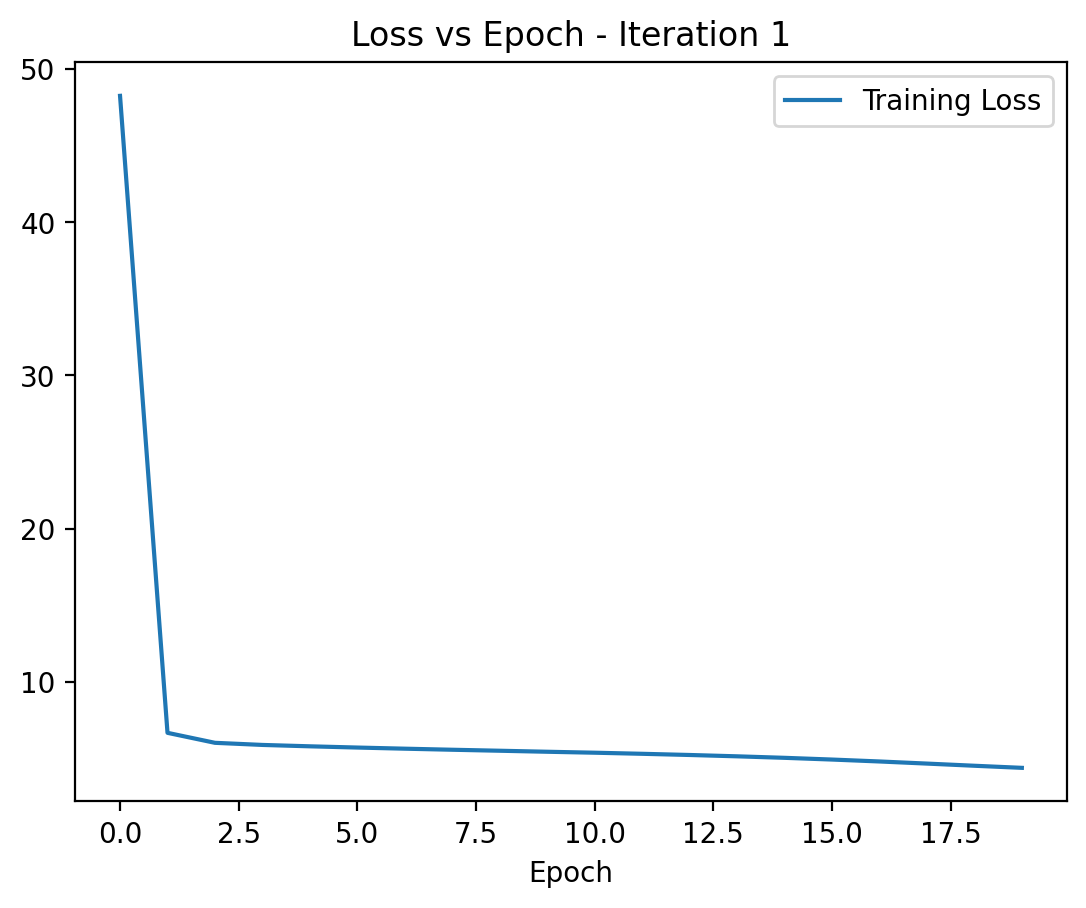

Iteration 2
Epoch 1/20
124/124 [==============================] - 1s 2ms/step - loss: 56.0101
Epoch 2/20
124/124 [==============================] - 0s 2ms/step - loss: 7.4697
Epoch 3/20
124/124 [==============================] - 0s 2ms/step - loss: 6.5801
Epoch 4/20
124/124 [==============================] - 0s 2ms/step - loss: 6.4058
Epoch 5/20
124/124 [==============================] - 0s 3ms/step - loss: 6.2349
Epoch 6/20
124/124 [==============================] - 0s 2ms/step - loss: 6.0722
Epoch 7/20
124/124 [==============================] - 0s 2ms/step - loss: 5.9235
Epoch 8/20
124/124 [==============================] - 0s 3ms/step - loss: 5.7928
Epoch 9/20
124/124 [==============================] - 0s 3ms/step - loss: 5.6809
Epoch 10/20
124/124 [==============================] - 0s 3ms/step - loss: 5.5833
Epoch 11/20
124/124 [==============================] - 0s 3ms/step - loss: 5.4929
Epoch 12/20
124/124 [==============================] - 0s 3ms/step - loss: 5.4002
Epoch 13/20


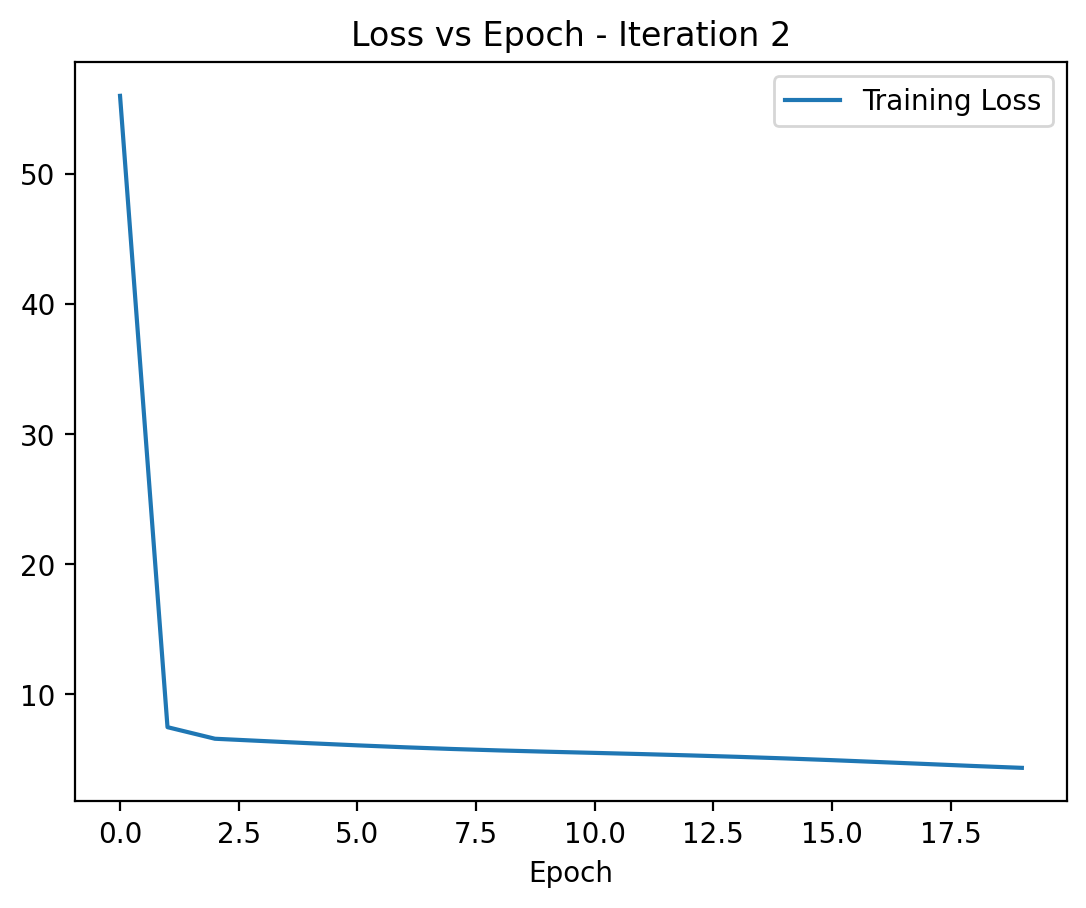

Iteration 3
Epoch 1/20
124/124 [==============================] - 1s 4ms/step - loss: 70.7036
Epoch 2/20
124/124 [==============================] - 0s 2ms/step - loss: 9.4211
Epoch 3/20
124/124 [==============================] - 0s 2ms/step - loss: 6.7482
Epoch 4/20
124/124 [==============================] - 0s 2ms/step - loss: 6.5695
Epoch 5/20
124/124 [==============================] - 0s 3ms/step - loss: 6.4075
Epoch 6/20
124/124 [==============================] - 0s 3ms/step - loss: 6.2603
Epoch 7/20
124/124 [==============================] - 0s 3ms/step - loss: 6.1286
Epoch 8/20
124/124 [==============================] - 0s 3ms/step - loss: 6.0101
Epoch 9/20
124/124 [==============================] - 0s 3ms/step - loss: 5.9062
Epoch 10/20
124/124 [==============================] - 0s 4ms/step - loss: 5.8135
Epoch 11/20
124/124 [==============================] - 0s 2ms/step - loss: 5.7302
Epoch 12/20
124/124 [==============================] - 0s 2ms/step - loss: 5.6532
Epoch 13/20


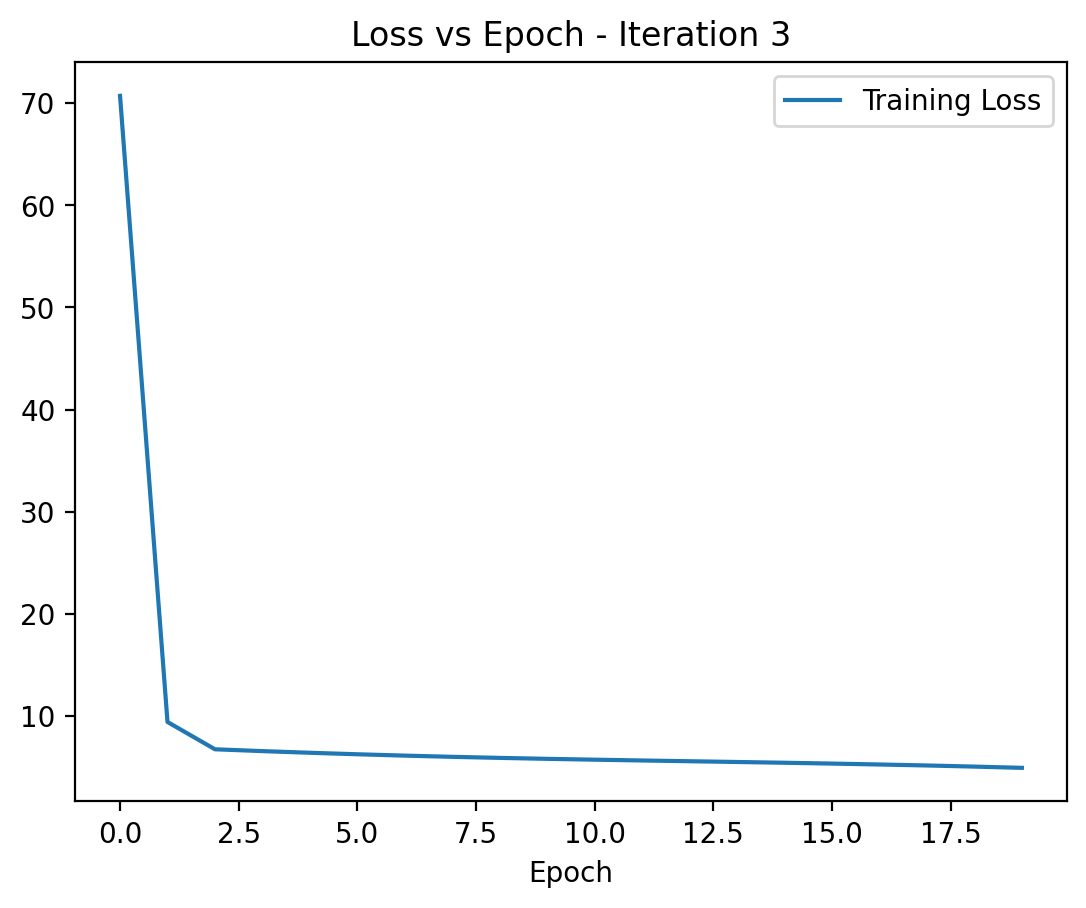

In [38]:
for i in range(3):
  print(f"Iteration {i+1}")
  model = Sequential()
  model.add(Dense(units=10, use_bias=True, input_shape=(n_cols,)))
  model.add(Dense(10, use_bias=True))
  model.add(Dense(1, use_bias=True))
  start_time = time.time()
  model.compile(optimizer='adam', loss='mean_squared_error')
  history = model.fit(X_train, y_train,
                      epochs=20,
                      verbose=1,
                      batch_size=512)
  end_time=time.time()
  train_r2 = metrics.r2_score(y_train, model.predict(X_train, verbose=0))
  test_r2 = metrics.r2_score(y_test, model.predict(X_test, verbose=0))
  print("Train r2", train_r2)
  print("Test r2", test_r2)
  raw_results = pd.DataFrame([{'Model_specs': 'NN 2 hidden 10 neuron each no activation 20 epoch 512 batch size',
                               'iteration':i+1,
                               'train_r2': train_r2,
                               'test_r2': test_r2,
                               'elapsed_time':end_time - start_time,
                               'timestamp':end_time}])
  final_results_df = pd.concat([final_results_df, raw_results], ignore_index = True)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.xlabel('Epoch')
  plt.title(f'Loss vs Epoch - Iteration {i+1}')
  plt.legend()
  plt.show()

In [39]:
final_results_df.sort_values("timestamp", ascending=False).head(6)

,Model_specs,iteration,train_r2,test_r2,elapsed_time,timestamp
14,NN 2 hidden 10 neuron each no activation 20 ep...,3,0.517663,0.517187,11.168282,1.715139e+09
13,NN 2 hidden 10 neuron each no activation 20 ep...,2,0.576064,0.575790,10.968635,1.715139e+09
12,NN 2 hidden 10 neuron each no activation 20 ep...,1,0.572160,0.571935,6.003585,1.715139e+09
11,NN 2 hidden 10 neuron each relu activation 20 ...,3,0.581153,0.580550,11.076338,1.715139e+09
10,NN 2 hidden 10 neuron each relu activation 20 ...,2,0.603488,0.603333,5.208359,1.715139e+09
9,NN 2 hidden 10 neuron each relu activation 20 ...,1,0.591610,0.591657,11.254701,1.715139e+09


### Q 5.b.
- Compile the model:  
    - otimizer='adam'
    - loss='mean_squared_error'  
- Fit the model:
    - epochs=20  
    - verbose=1
    - batch_size=32
- Plot the loss vs epoch
- Make predictions on the training and test sets  
- What is the $R^2$ score for training and test sets?
- Measure the time spent for training.
    - How long does it take to train the model? You can use the `time` package:
    - Start timer before compile and stop after fitting
    - How long does each epoch take on average?
    - Compared to full set size (where `batch_size=None`) and batch size of 512, did setting batch size to 32 make the training faster?
    - Compared to full set size (where `batch_size=None`) and batch size of 512, did setting batch size to 32 have any impact on model performance ($R^2$)?



Iteration 1
Epoch 1/20
1983/1983 [==============================] - 5s 2ms/step - loss: 9.9924
Epoch 2/20
1983/1983 [==============================] - 3s 2ms/step - loss: 4.1220
Epoch 3/20
1983/1983 [==============================] - 3s 2ms/step - loss: 3.8490
Epoch 4/20
1983/1983 [==============================] - 5s 2ms/step - loss: 3.8152
Epoch 5/20
1983/1983 [==============================] - 3s 2ms/step - loss: 3.8110
Epoch 6/20
1983/1983 [==============================] - 3s 2ms/step - loss: 3.7999
Epoch 7/20
1983/1983 [==============================] - 3s 2ms/step - loss: 3.7964
Epoch 8/20
1983/1983 [==============================] - 4s 2ms/step - loss: 3.7919
Epoch 9/20
1983/1983 [==============================] - 3s 2ms/step - loss: 3.7940
Epoch 10/20
1983/1983 [==============================] - 3s 2ms/step - loss: 3.7899
Epoch 11/20
1983/1983 [==============================] - 3s 2ms/step - loss: 3.7857
Epoch 12/20
1983/1983 [==============================] - 5s 3ms/step - lo

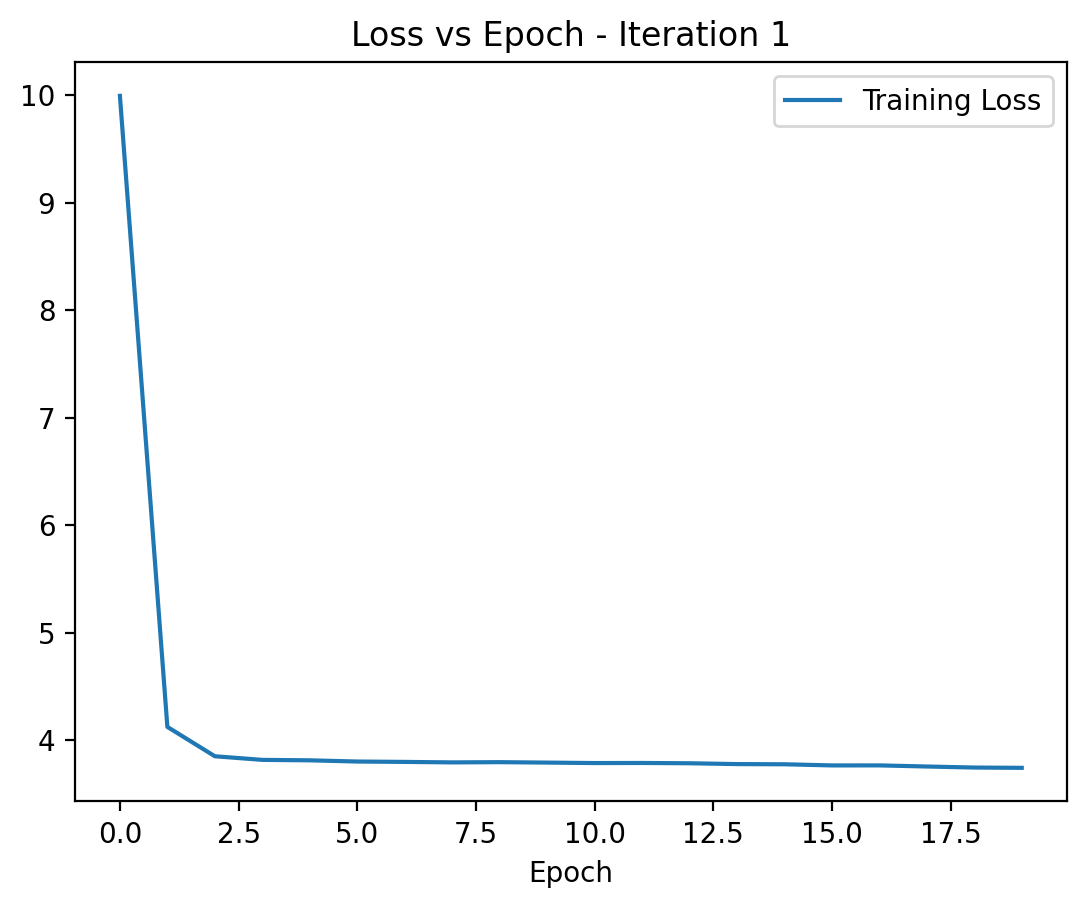

Iteration 2
Epoch 1/20
1983/1983 [==============================] - 5s 2ms/step - loss: 10.6524
Epoch 2/20
1983/1983 [==============================] - 3s 2ms/step - loss: 4.1805
Epoch 3/20
1983/1983 [==============================] - 3s 2ms/step - loss: 3.9333
Epoch 4/20
1983/1983 [==============================] - 3s 2ms/step - loss: 3.9005
Epoch 5/20
1983/1983 [==============================] - 5s 2ms/step - loss: 3.8903
Epoch 6/20
1983/1983 [==============================] - 4s 2ms/step - loss: 3.8858
Epoch 7/20
1983/1983 [==============================] - 3s 2ms/step - loss: 3.8694
Epoch 8/20
1983/1983 [==============================] - 4s 2ms/step - loss: 3.8674
Epoch 9/20
1983/1983 [==============================] - 4s 2ms/step - loss: 3.8626
Epoch 10/20
1983/1983 [==============================] - 3s 2ms/step - loss: 3.8605
Epoch 11/20
1983/1983 [==============================] - 3s 2ms/step - loss: 3.8537
Epoch 12/20
1983/1983 [==============================] - 5s 3ms/step - l

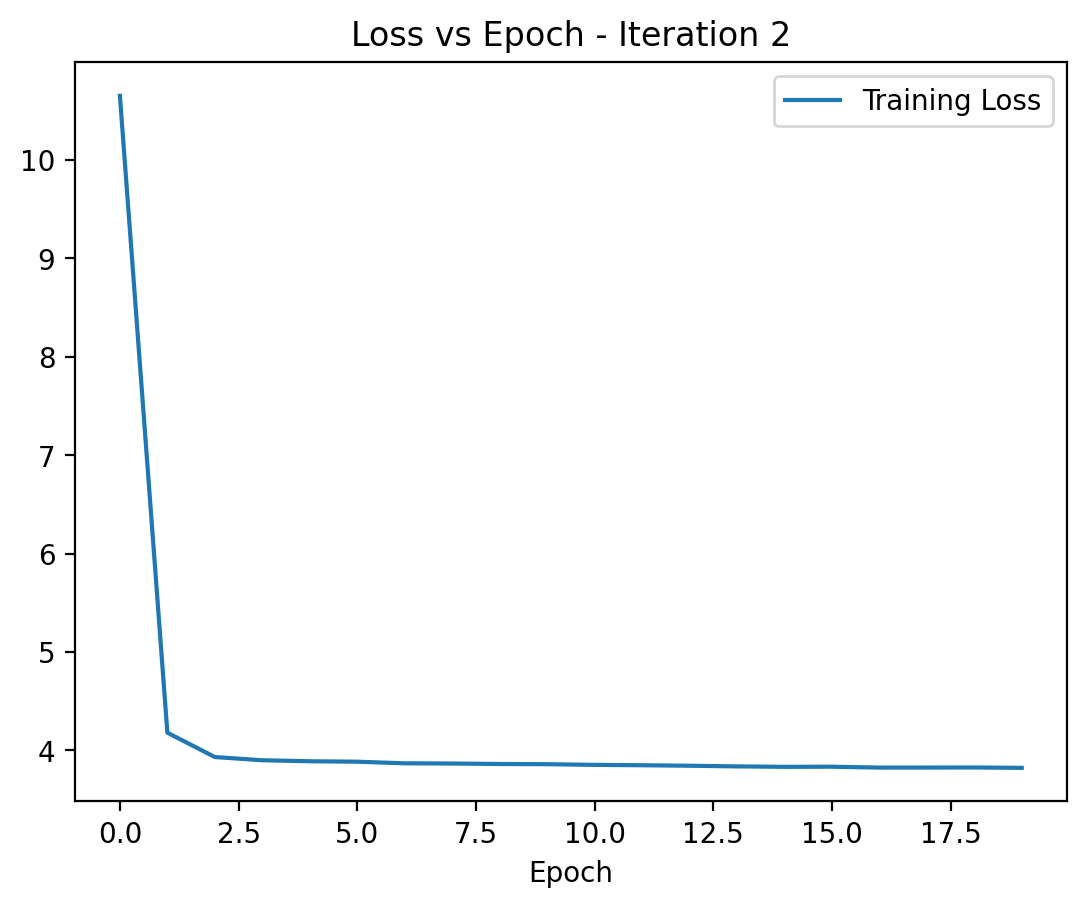

Iteration 3
Epoch 1/20
1983/1983 [==============================] - 4s 2ms/step - loss: 10.5104
Epoch 2/20
1983/1983 [==============================] - 3s 2ms/step - loss: 4.7616
Epoch 3/20
1983/1983 [==============================] - 5s 2ms/step - loss: 4.0613
Epoch 4/20
1983/1983 [==============================] - 3s 2ms/step - loss: 3.9231
Epoch 5/20
1983/1983 [==============================] - 3s 2ms/step - loss: 3.8958
Epoch 6/20
1983/1983 [==============================] - 4s 2ms/step - loss: 3.8694
Epoch 7/20
1983/1983 [==============================] - 4s 2ms/step - loss: 3.8523
Epoch 8/20
1983/1983 [==============================] - 3s 2ms/step - loss: 3.8422
Epoch 9/20
1983/1983 [==============================] - 3s 2ms/step - loss: 3.8331
Epoch 10/20
1983/1983 [==============================] - 3s 2ms/step - loss: 3.8289
Epoch 11/20
1983/1983 [==============================] - 4s 2ms/step - loss: 3.8276
Epoch 12/20
1983/1983 [==============================] - 3s 2ms/step - l

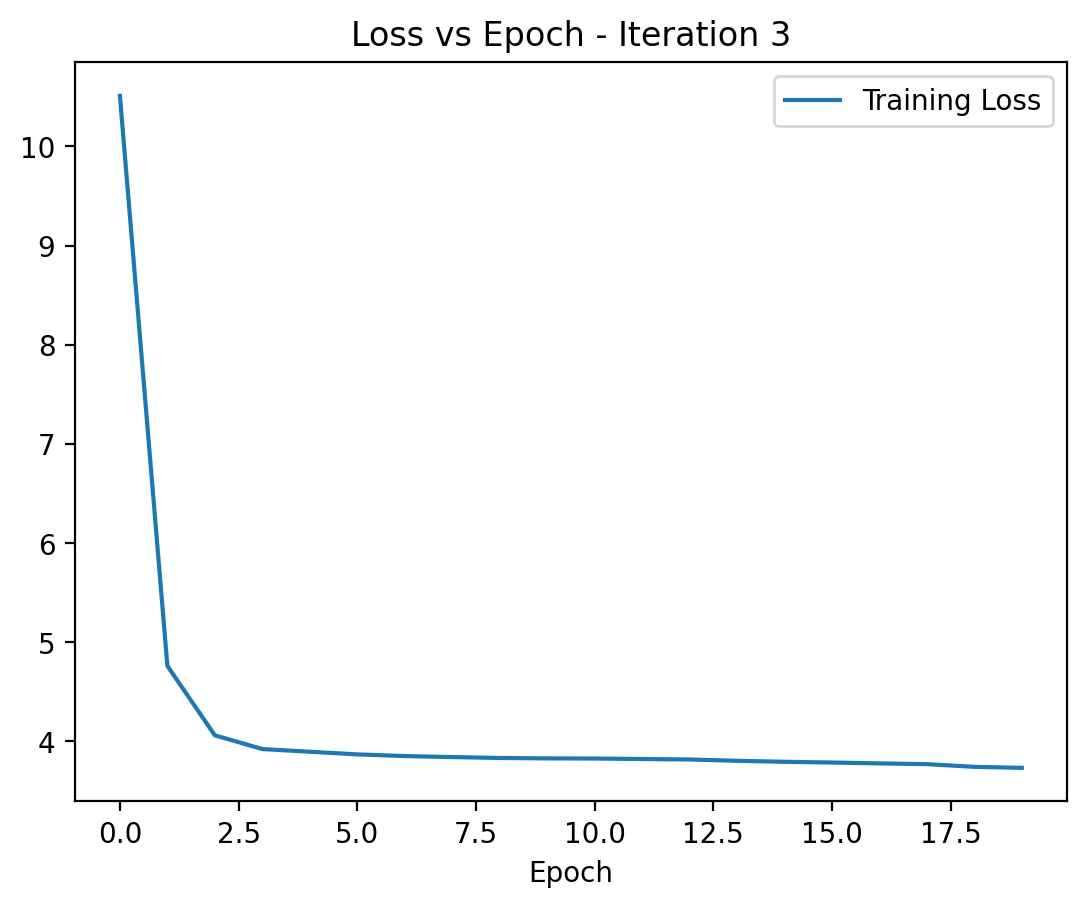

In [40]:
for i in range(3):
  print(f"Iteration {i+1}")
  model = Sequential()
  model.add(Dense(units=10, use_bias=True, activation='relu', input_shape=(n_cols,)))
  model.add(Dense(10, use_bias=True))
  model.add(Dense(1, use_bias=True))
  start_time = time.time()
  model.compile(optimizer='adam', loss='mean_squared_error')
  history = model.fit(X_train, y_train,
                      epochs=20,
                      verbose=1,
                      batch_size=32)
  end_time=time.time()
  train_r2 = metrics.r2_score(y_train, model.predict(X_train, verbose=0))
  test_r2 = metrics.r2_score(y_test, model.predict(X_test, verbose=0))
  print("Train r2", train_r2)
  print("Test r2", test_r2)
  raw_results = pd.DataFrame([{'Model_specs': 'NN 2 hidden 10 neuron each relu activation 20 epoch 32 batch size',
                               'iteration':i+1,
                               'train_r2': train_r2,
                               'test_r2': test_r2,
                               'elapsed_time':end_time - start_time,
                               'timestamp':end_time}])
  final_results_df = pd.concat([final_results_df, raw_results], ignore_index = True)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.xlabel('Epoch')
  plt.title(f'Loss vs Epoch - Iteration {i+1}')
  plt.legend()
  plt.show()

In [41]:
final_results_df.sort_values("timestamp", ascending=False).head(6)

,Model_specs,iteration,train_r2,test_r2,elapsed_time,timestamp
17,NN 2 hidden 10 neuron each relu activation 20 ...,3,0.630727,0.630500,72.881692,1.715139e+09
16,NN 2 hidden 10 neuron each relu activation 20 ...,2,0.619422,0.620140,82.628763,1.715139e+09
15,NN 2 hidden 10 neuron each relu activation 20 ...,1,0.632235,0.632167,73.740251,1.715139e+09
14,NN 2 hidden 10 neuron each no activation 20 ep...,3,0.517663,0.517187,11.168282,1.715139e+09
13,NN 2 hidden 10 neuron each no activation 20 ep...,2,0.576064,0.575790,10.968635,1.715139e+09
12,NN 2 hidden 10 neuron each no activation 20 ep...,1,0.572160,0.571935,6.003585,1.715139e+09


Setting batch_size to 32, did not make the training time any faster. However, the performance of the model improved.

### Q 6.a.
- Build a neural network with two hidden layers, 10 neurons each.
- We will not apply any activation functions.

Iteration 1
Epoch 1/20
1983/1983 [==============================] - 4s 2ms/step - loss: 7.7517
Epoch 2/20
1983/1983 [==============================] - 3s 2ms/step - loss: 4.4947
Epoch 3/20
1983/1983 [==============================] - 3s 2ms/step - loss: 4.1097
Epoch 4/20
1983/1983 [==============================] - 4s 2ms/step - loss: 4.0753
Epoch 5/20
1983/1983 [==============================] - 3s 2ms/step - loss: 4.0602
Epoch 6/20
1983/1983 [==============================] - 3s 2ms/step - loss: 4.0446
Epoch 7/20
1983/1983 [==============================] - 3s 2ms/step - loss: 4.0357
Epoch 8/20
1983/1983 [==============================] - 5s 2ms/step - loss: 4.0276
Epoch 9/20
1983/1983 [==============================] - 3s 2ms/step - loss: 4.0301
Epoch 10/20
1983/1983 [==============================] - 3s 2ms/step - loss: 4.0348
Epoch 11/20
1983/1983 [==============================] - 3s 2ms/step - loss: 4.0247
Epoch 12/20
1983/1983 [==============================] - 4s 2ms/step - lo

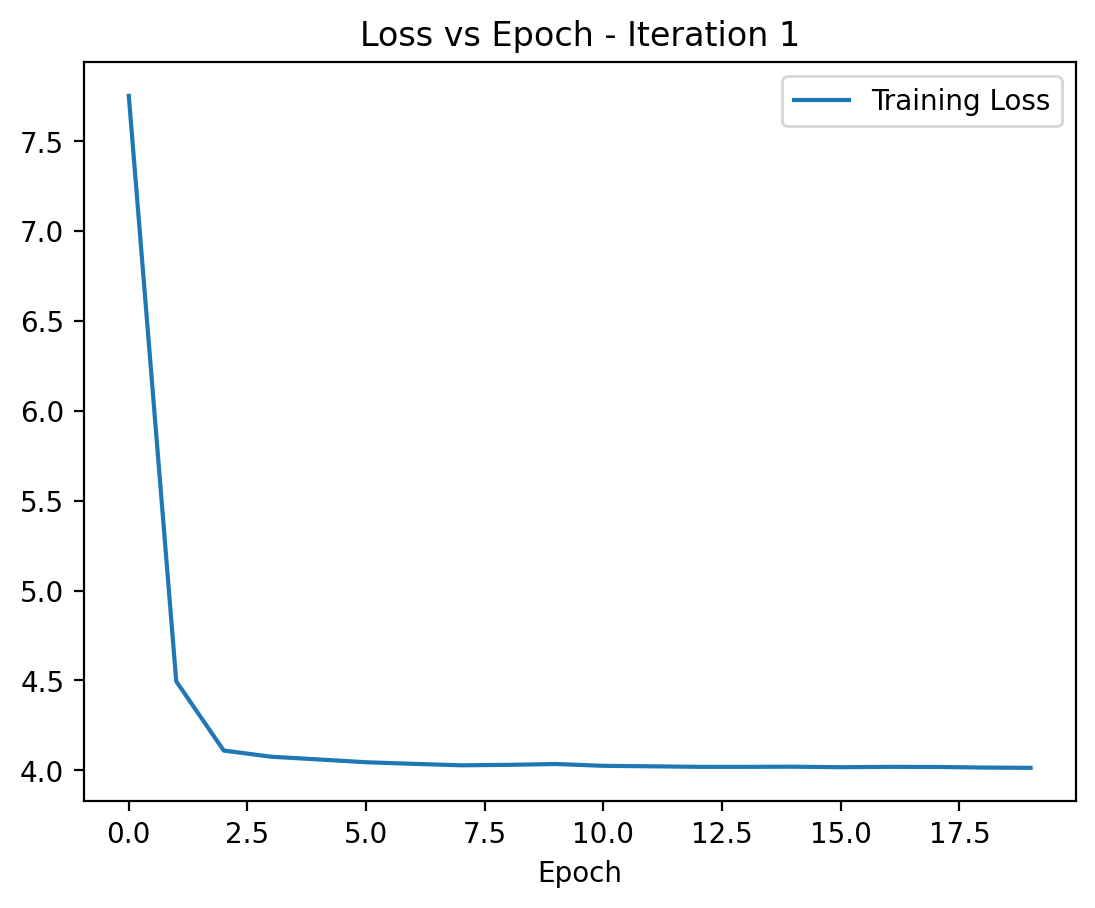

Iteration 2
Epoch 1/20
1983/1983 [==============================] - 4s 2ms/step - loss: 8.9397
Epoch 2/20
1983/1983 [==============================] - 4s 2ms/step - loss: 4.9403
Epoch 3/20
1983/1983 [==============================] - 3s 2ms/step - loss: 4.1174
Epoch 4/20
1983/1983 [==============================] - 3s 2ms/step - loss: 4.0369
Epoch 5/20
1983/1983 [==============================] - 4s 2ms/step - loss: 4.0359
Epoch 6/20
1983/1983 [==============================] - 4s 2ms/step - loss: 4.0272
Epoch 7/20
1983/1983 [==============================] - 3s 2ms/step - loss: 4.0362
Epoch 8/20
1983/1983 [==============================] - 3s 2ms/step - loss: 4.0222
Epoch 9/20
1983/1983 [==============================] - 4s 2ms/step - loss: 4.0222
Epoch 10/20
1983/1983 [==============================] - 4s 2ms/step - loss: 4.0228
Epoch 11/20
1983/1983 [==============================] - 3s 2ms/step - loss: 4.0155
Epoch 12/20
1983/1983 [==============================] - 3s 2ms/step - lo

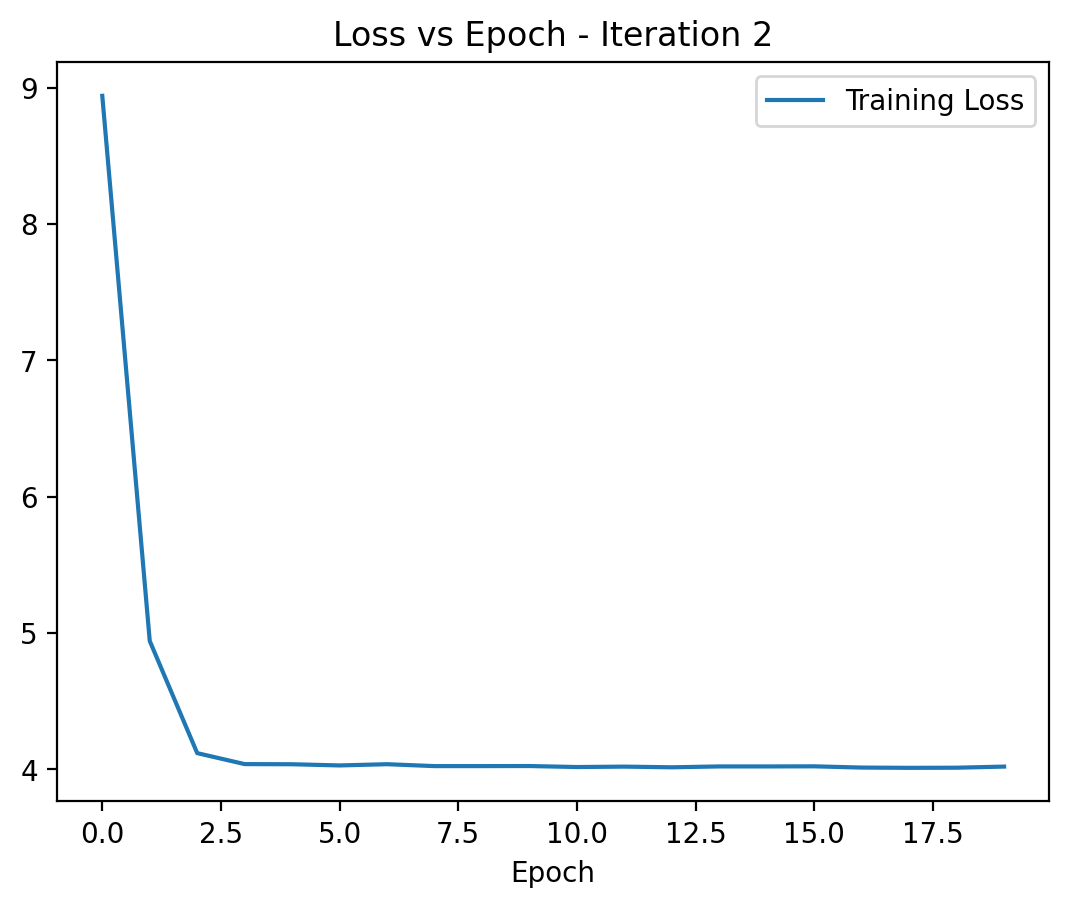

Iteration 3
Epoch 1/20
1983/1983 [==============================] - 4s 2ms/step - loss: 10.2003
Epoch 2/20
1983/1983 [==============================] - 3s 2ms/step - loss: 4.8837
Epoch 3/20
1983/1983 [==============================] - 5s 2ms/step - loss: 4.1084
Epoch 4/20
1983/1983 [==============================] - 3s 2ms/step - loss: 4.0364
Epoch 5/20
1983/1983 [==============================] - 3s 2ms/step - loss: 4.0308
Epoch 6/20
1983/1983 [==============================] - 3s 2ms/step - loss: 4.0262
Epoch 7/20
1983/1983 [==============================] - 5s 2ms/step - loss: 4.0212
Epoch 8/20
1983/1983 [==============================] - 3s 2ms/step - loss: 4.0223
Epoch 9/20
1983/1983 [==============================] - 3s 2ms/step - loss: 4.0249
Epoch 10/20
1983/1983 [==============================] - 4s 2ms/step - loss: 4.0178
Epoch 11/20
1983/1983 [==============================] - 4s 2ms/step - loss: 4.0174
Epoch 12/20
1983/1983 [==============================] - 3s 2ms/step - l

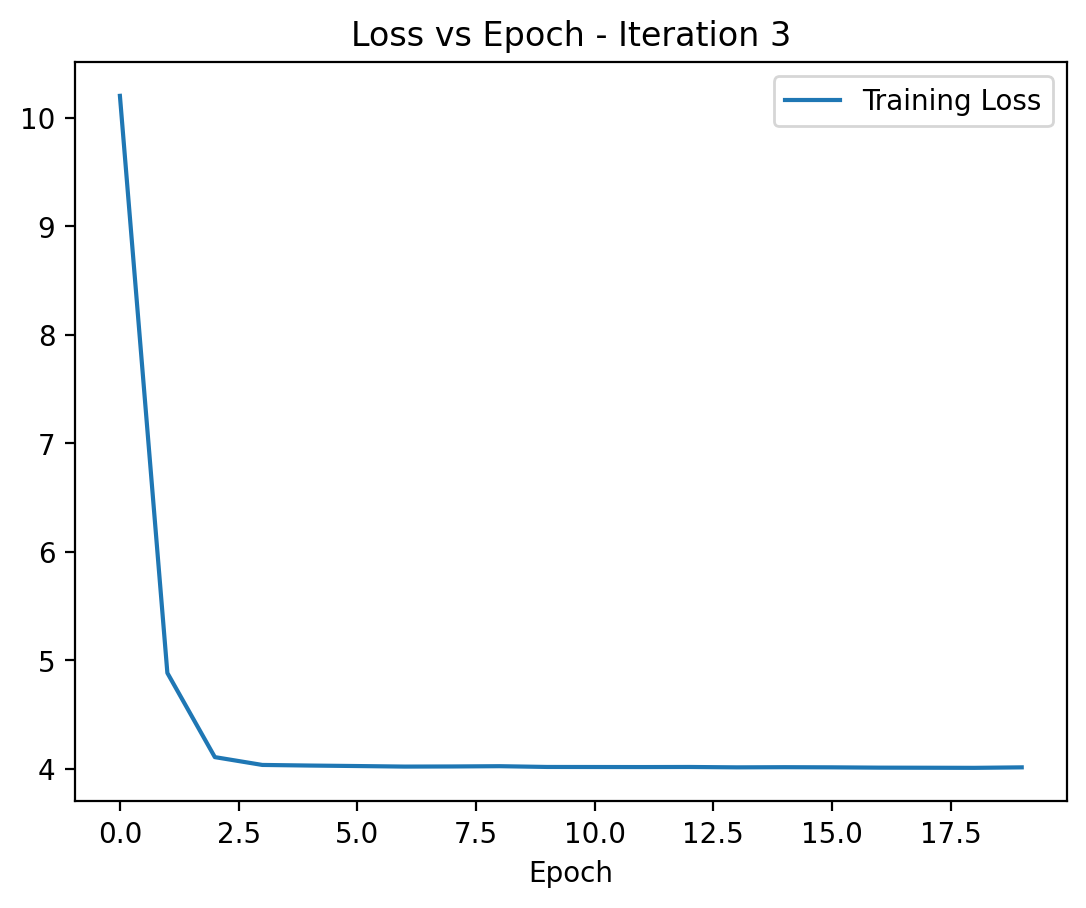

In [42]:
for i in range(3):
  print(f"Iteration {i + 1}")
  model = Sequential()
  model.add(Dense(units=10, use_bias=True, input_shape=(n_cols,)))
  model.add(Dense(10, use_bias=True))
  model.add(Dense(1, use_bias=True))
  start_time = time.time()
  model.compile(optimizer='adam', loss='mean_squared_error')
  history = model.fit(X_train, y_train,
                      epochs=20,
                      verbose=1,
                      batch_size=32)
  end_time=time.time()
  train_r2 = metrics.r2_score(y_train, model.predict(X_train, verbose=0))
  test_r2 = metrics.r2_score(y_test, model.predict(X_test, verbose=0))
  print("Train r2", train_r2)
  print("Test r2", test_r2)
  raw_results = pd.DataFrame([{'Model_specs': 'NN 2 hidden 10 neuron each no activation 20 epoch 32 batch size',
                               'iteration':i+1,
                               'train_r2': train_r2,
                               'test_r2': test_r2,
                               'elapsed_time':end_time - start_time,
                               'timestamp':end_time}])
  final_results_df = pd.concat([final_results_df, raw_results], ignore_index = True)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.xlabel('Epoch')
  plt.title(f'Loss vs Epoch - Iteration {i+1}')
  plt.legend()
  plt.show()

In [43]:
final_results_df

,Model_specs,iteration,train_r2,test_r2,elapsed_time,timestamp
0,NN 2 hidden 10 neuron each no activation function,1,0.603177,0.603110,42.151266,1.715138e+09
1,NN 2 hidden 10 neuron each no activation function,2,0.602771,0.601990,28.663390,1.715138e+09
2,NN 2 hidden 10 neuron each no activation function,3,0.603913,0.603393,41.693120,1.715139e+09
3,NN 2 hidden 10 neuron each relu activation 20 ...,1,0.630023,0.630225,73.711418,1.715139e+09
4,NN 2 hidden 10 neuron each relu activation 20 ...,2,0.622490,0.621584,82.910604,1.715139e+09
5,NN 2 hidden 10 neuron each relu activation 20 ...,3,0.622644,0.622950,73.177495,1.715139e+09
6,NN 2 hidden 10 neuron each no activation 20 ep...,1,0.605191,0.604549,73.552657,1.715139e+09
7,NN 2 hidden 10 neuron each no activation 20 ep...,2,0.604754,0.604060,82.626861,1.715139e+09
8,NN 2 hidden 10 neuron each no activation 20 ep...,3,0.604015,0.603139,75.076602,1.715139e+09
9,NN 2 hidden 10 neuron each relu activation 20 ...,1,0.591610,0.591657,11.254701,1.715139e+09


### Q 6.b.
- Compile the model:  
    - otimizer='adam'
    - loss='mean_squared_error'  
- Fit the model:
    - epochs=20
    - verbose= your choice
    - batch_size= your choice
- Plot the loss vs epoch
- Make predictions on the training and test sets  
- What is the $R^2$ score for training and test sets?
- Measure the time spent for training.
- Check out the predictions
    - Create a scatter plot of predictions vs actual values
    - Create 5 number summary of your predictions
    - Are there any negative predictions?
    - Is it possible (logical, sensible) to have negative values for our dataset?
    - What can you do to not have any negative predictions without changing the model? Focus on post processing of predictions. (If you have other ideas regarding the model, you can implement them in the next question)

Iteration 1
Epoch 1/20
6343/6343 [==============================] - 12s 2ms/step - loss: 6.1004
Epoch 2/20
6343/6343 [==============================] - 11s 2ms/step - loss: 4.0475
Epoch 3/20
6343/6343 [==============================] - 13s 2ms/step - loss: 3.9937
Epoch 4/20
6343/6343 [==============================] - 10s 2ms/step - loss: 3.9757
Epoch 5/20
6343/6343 [==============================] - 10s 2ms/step - loss: 3.9677
Epoch 6/20
6343/6343 [==============================] - 12s 2ms/step - loss: 3.9535
Epoch 7/20
6343/6343 [==============================] - 12s 2ms/step - loss: 3.9501
Epoch 8/20
6343/6343 [==============================] - 11s 2ms/step - loss: 3.9434
Epoch 9/20
6343/6343 [==============================] - 11s 2ms/step - loss: 3.9376
Epoch 10/20
6343/6343 [==============================] - 11s 2ms/step - loss: 3.9329
Epoch 11/20
6343/6343 [==============================] - 11s 2ms/step - loss: 3.9233
Epoch 12/20
6343/6343 [==============================] - 12s 2

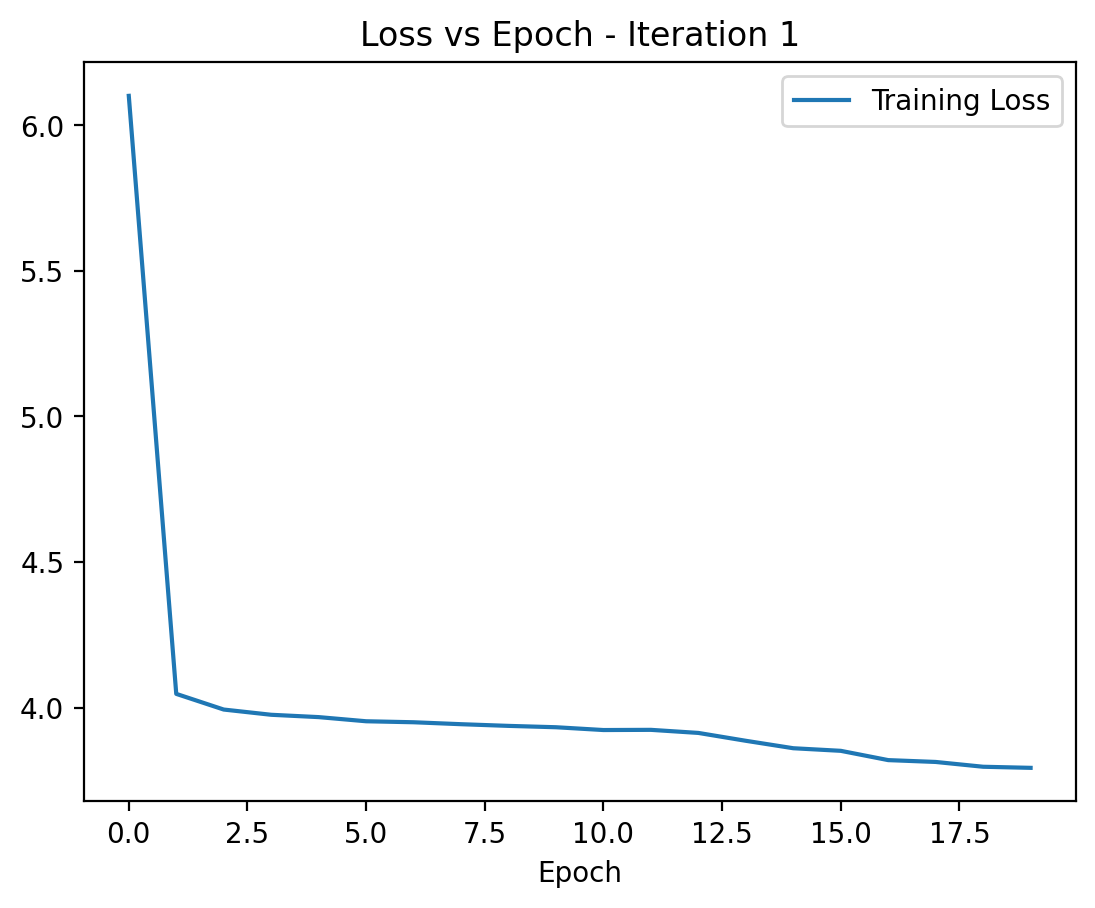

Iteration 2
Epoch 1/20
6343/6343 [==============================] - 12s 2ms/step - loss: 7.8403
Epoch 2/20
6343/6343 [==============================] - 11s 2ms/step - loss: 4.1928
Epoch 3/20
6343/6343 [==============================] - 11s 2ms/step - loss: 3.9941
Epoch 4/20
6343/6343 [==============================] - 10s 2ms/step - loss: 3.9567
Epoch 5/20
6343/6343 [==============================] - 11s 2ms/step - loss: 3.8868
Epoch 6/20
6343/6343 [==============================] - 11s 2ms/step - loss: 3.8515
Epoch 7/20
6343/6343 [==============================] - 11s 2ms/step - loss: 3.8391
Epoch 8/20
6343/6343 [==============================] - 11s 2ms/step - loss: 3.8168
Epoch 9/20
6343/6343 [==============================] - 10s 2ms/step - loss: 3.7971
Epoch 10/20
6343/6343 [==============================] - 11s 2ms/step - loss: 3.7903
Epoch 11/20
6343/6343 [==============================] - 11s 2ms/step - loss: 3.7837
Epoch 12/20
6343/6343 [==============================] - 11s 2

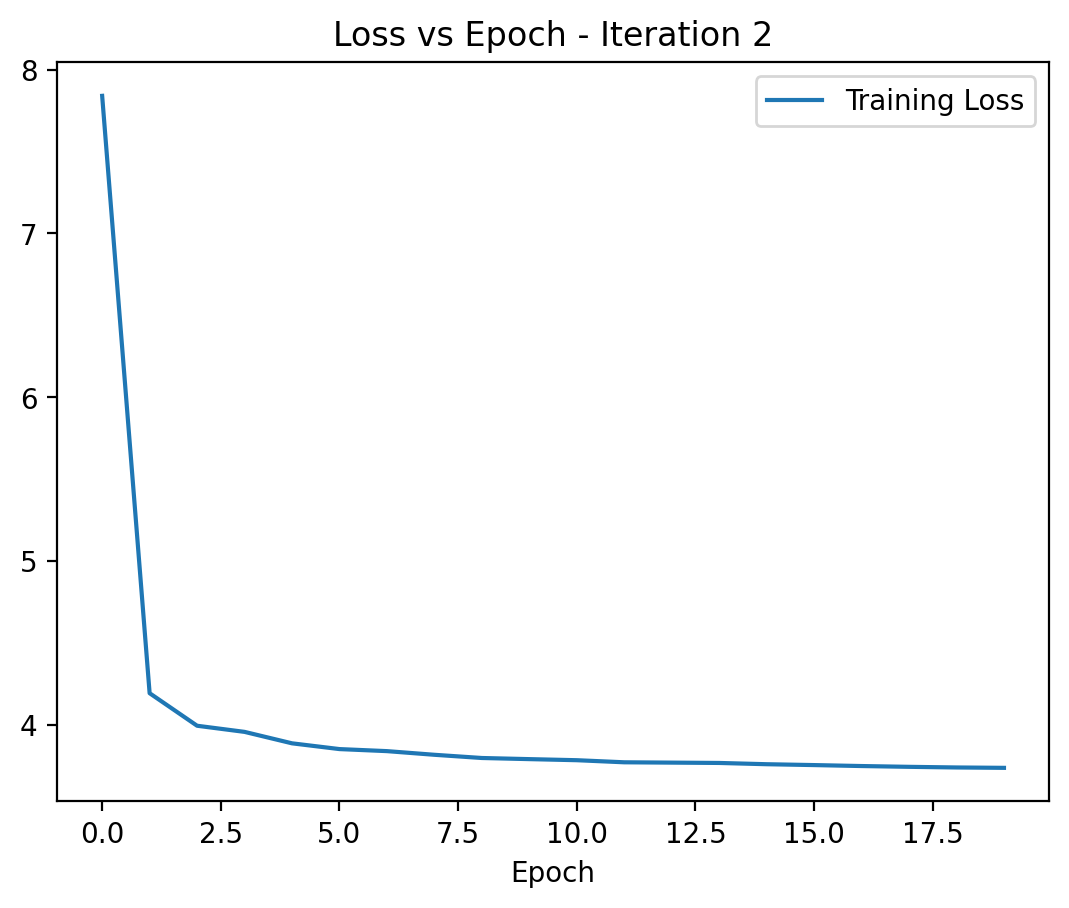

Iteration 3
Epoch 1/20
6343/6343 [==============================] - 12s 2ms/step - loss: 6.2601
Epoch 2/20
6343/6343 [==============================] - 11s 2ms/step - loss: 4.0454
Epoch 3/20
6343/6343 [==============================] - 11s 2ms/step - loss: 3.9817
Epoch 4/20
6343/6343 [==============================] - 12s 2ms/step - loss: 3.9339
Epoch 5/20
6343/6343 [==============================] - 11s 2ms/step - loss: 3.8638
Epoch 6/20
6343/6343 [==============================] - 12s 2ms/step - loss: 3.8441
Epoch 7/20
6343/6343 [==============================] - 11s 2ms/step - loss: 3.8315
Epoch 8/20
6343/6343 [==============================] - 10s 2ms/step - loss: 3.8197
Epoch 9/20
6343/6343 [==============================] - 11s 2ms/step - loss: 3.8158
Epoch 10/20
6343/6343 [==============================] - 13s 2ms/step - loss: 3.8160
Epoch 11/20
6343/6343 [==============================] - 13s 2ms/step - loss: 3.8054
Epoch 12/20
6343/6343 [==============================] - 11s 2

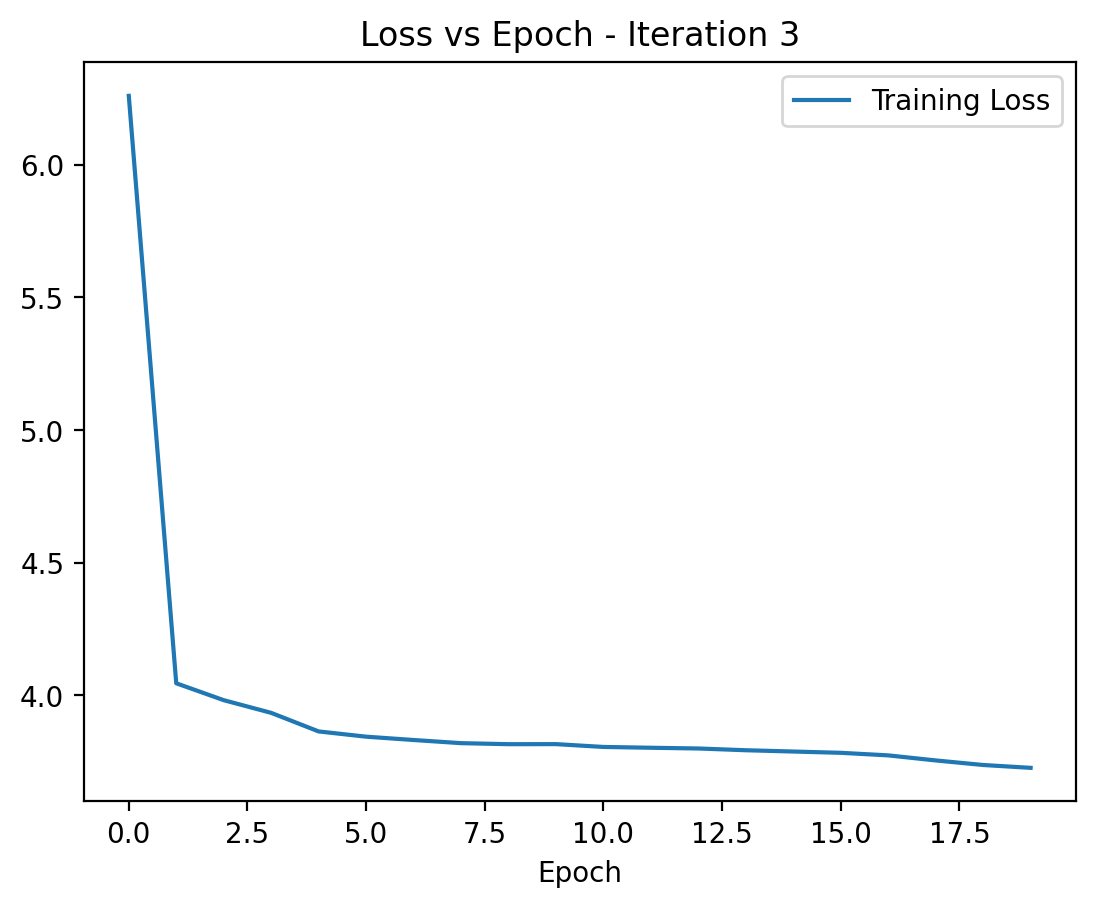

In [44]:
for i in range(3):
  print(f"Iteration {i+1}")
  model = Sequential()
  model.add(Dense(units=10, use_bias=True, activation = 'relu', input_shape=(n_cols,)))
  model.add(Dense(10, use_bias=True))
  model.add(Dense(1, use_bias=True))
  start_time = time.time()
  model.compile(optimizer='adam', loss='mean_squared_error')
  history = model.fit(X_train, y_train,
                      epochs=20,
                      verbose=1,
                      batch_size=10)
  end_time=time.time()
  train_r2 = metrics.r2_score(y_train, model.predict(X_train, verbose=0))
  test_r2 = metrics.r2_score(y_test, model.predict(X_test, verbose=0))
  print("Train r2", train_r2)
  print("Test r2", test_r2)
  raw_results = pd.DataFrame([{'Model_specs': 'NN 2 hidden 10 neuron each relu activation 20 epoch 10 batch size',
                               'iteration':i+1,
                               'train_r2': train_r2,
                               'test_r2': test_r2,
                               'elapsed_time':end_time - start_time,
                               'timestamp':end_time}])
  final_results_df = pd.concat([final_results_df, raw_results], ignore_index = True)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.xlabel('Epoch')
  plt.title(f'Loss vs Epoch - Iteration {i+1}')
  plt.legend()
  plt.show()

In [45]:
final_results_df.sort_values("timestamp", ascending=False).head(6)

,Model_specs,iteration,train_r2,test_r2,elapsed_time,timestamp
23,NN 2 hidden 10 neuron each relu activation 20 ...,3,0.635296,0.635114,262.633525,1.715140e+09
22,NN 2 hidden 10 neuron each relu activation 20 ...,2,0.631412,0.631792,262.560235,1.715140e+09
21,NN 2 hidden 10 neuron each relu activation 20 ...,1,0.630258,0.630055,262.682091,1.715140e+09
20,NN 2 hidden 10 neuron each no activation 20 ep...,3,0.600265,0.599701,82.699931,1.715140e+09
19,NN 2 hidden 10 neuron each no activation 20 ep...,2,0.604171,0.603370,82.614182,1.715140e+09
18,NN 2 hidden 10 neuron each no activation 20 ep...,1,0.604056,0.603837,82.777614,1.715139e+09


In [46]:
y_train_pred = model.predict(X_train, verbose=0).flatten()
y_test_pred = model.predict(X_test, verbose=0).flatten()

In [47]:
print("Training set - Predictions:", y_train_pred[:5])
print("Test set - Predictions:", y_test_pred[:5])

Training set - Predictions: [ 9.684111 11.223092  6.114461  8.619511  9.321333]
Test set - Predictions: [12.031063 12.393908  7.687029 14.615804 11.566857]


In [48]:
all_preds = model.predict(X, verbose=0).flatten()

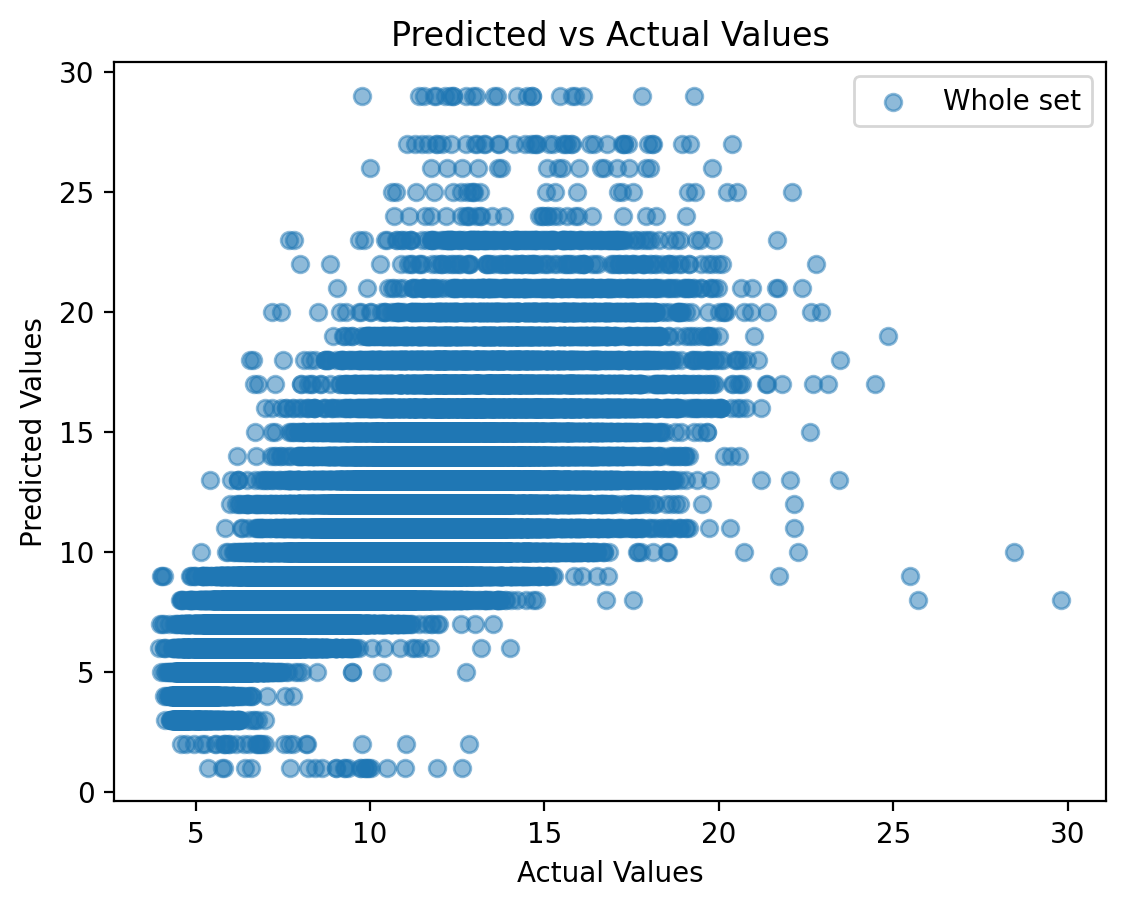

In [49]:
plt.scatter(all_preds, y, label='Whole set', alpha=0.5)
# plt.scatter(y_test, y_test_pred, label='Test Set', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()

In [50]:
summary_train = np.percentile(y_train_pred, [0, 25, 50, 75, 100])
summary_test = np.percentile(y_test_pred, [0, 25, 50, 75, 100])

In [51]:
summary_train

array([ 3.96792698,  7.82782555,  9.57066631, 11.07483244, 28.44792557])

In [52]:
summary_test

array([ 3.95191073,  7.84146976,  9.57363129, 11.08602428, 29.8071537 ])

In [53]:
if (any(y_train_pred < 0) | any(y_test_pred < 0)):
  print('Some negative predictions')
else:
  print('No negative predictions')

No negative predictions


If there are any negative predictions, best way is to clip the predicted values to ensure they are non-negative.

It ensures that any negative predictions (y_pred < 0) are replaced with zeros (0), effectively making all predictions non-negative.



### Q 7.
- Using the data, you are now free to explore different architectures and/or ideas.
- Suggest at least two new ideas.
  - For example: more layers, more hidden nodes, using different activation functions, etc.
- Implement at least two of your ideas and check their performance. Are they better?

## Different activation function with dropout with Adamax


In [54]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adamax

Epoch 1/20
6343/6343 [==============================] - 11s 2ms/step - loss: 9.0954
Epoch 2/20
6343/6343 [==============================] - 11s 2ms/step - loss: 6.0850
Epoch 3/20
6343/6343 [==============================] - 11s 2ms/step - loss: 4.8788
Epoch 4/20
6343/6343 [==============================] - 13s 2ms/step - loss: 4.3651
Epoch 5/20
6343/6343 [==============================] - 12s 2ms/step - loss: 4.2645
Epoch 6/20
6343/6343 [==============================] - 11s 2ms/step - loss: 4.2340
Epoch 7/20
6343/6343 [==============================] - 11s 2ms/step - loss: 4.2138
Epoch 8/20
6343/6343 [==============================] - 12s 2ms/step - loss: 4.2030
Epoch 9/20
6343/6343 [==============================] - 11s 2ms/step - loss: 4.2069
Epoch 10/20
6343/6343 [==============================] - 12s 2ms/step - loss: 4.1765
Epoch 11/20
6343/6343 [==============================] - 12s 2ms/step - loss: 4.1626
Epoch 12/20
6343/6343 [==============================] - 10s 2ms/step - lo

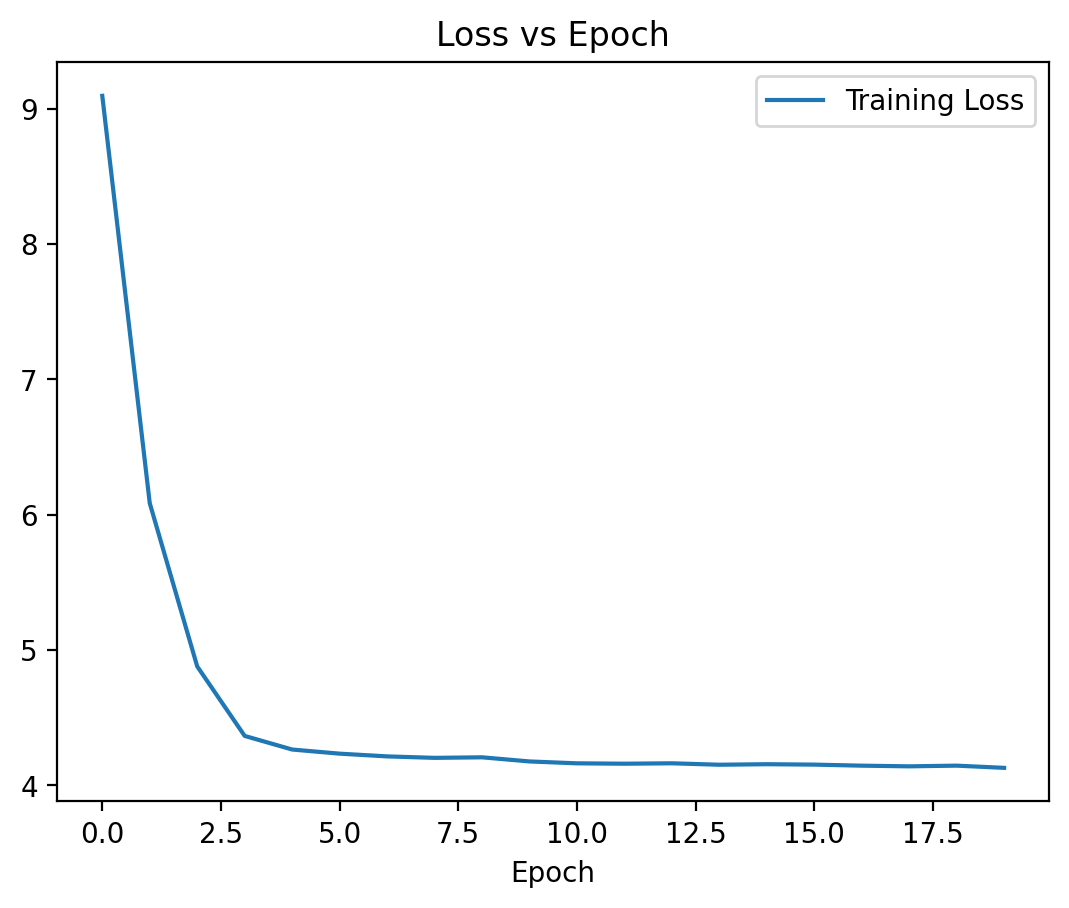

In [55]:
model = Sequential()
model.add(Dense(units=10, use_bias=True, activation = 'tanh', input_shape=(n_cols,)))
model.add(Dropout(.2))
model.add(Dense(10, use_bias=True))
model.add(Dense(1, use_bias=True))
start_time = time.time()
model.compile(optimizer=Adamax(learning_rate=.001), loss='mean_squared_error')
history = model.fit(X_train, y_train,
                   epochs=20,
                   verbose=1,
                   batch_size=10)
end_time=time.time()
print(f"Running time", end_time - start_time)
train_r2 = metrics.r2_score(y_train, model.predict(X_train, verbose=0))
test_r2 = metrics.r2_score(y_test, model.predict(X_test, verbose=0))
print("Train r2", train_r2)
print("Test r2", test_r2)
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.title(f'Loss vs Epoch')
plt.legend()
appr_1 = pd.DataFrame([{'Model_specs': 'Approach 1 - Different activation function with dropout with Adamax',
                               'iteration':i+1,
                               'train_r2': train_r2,
                               'test_r2': test_r2,
                               'elapsed_time':end_time - start_time,
                               'timestamp':end_time}])
final_results_df = pd.concat([final_results_df, appr_1], ignore_index = True)

In [56]:
final_results_df.sort_values("timestamp", ascending=False).head(6)

,Model_specs,iteration,train_r2,test_r2,elapsed_time,timestamp
24,Approach 1 - Different activation function wit...,3,0.608066,0.608592,262.635817,1.715141e+09
23,NN 2 hidden 10 neuron each relu activation 20 ...,3,0.635296,0.635114,262.633525,1.715140e+09
22,NN 2 hidden 10 neuron each relu activation 20 ...,2,0.631412,0.631792,262.560235,1.715140e+09
21,NN 2 hidden 10 neuron each relu activation 20 ...,1,0.630258,0.630055,262.682091,1.715140e+09
20,NN 2 hidden 10 neuron each no activation 20 ep...,3,0.600265,0.599701,82.699931,1.715140e+09
19,NN 2 hidden 10 neuron each no activation 20 ep...,2,0.604171,0.603370,82.614182,1.715140e+09


High training time.

Performance did not improve.

## More dense hidden layers with dropout


In [57]:
from tensorflow.keras.callbacks import EarlyStopping

Epoch 1/30
1269/1269 [==============================] - 6s 3ms/step - loss: 15.4967
Epoch 2/30
1269/1269 [==============================] - 3s 2ms/step - loss: 6.1992
Epoch 3/30
1269/1269 [==============================] - 3s 2ms/step - loss: 5.7766
Epoch 4/30
1269/1269 [==============================] - 3s 2ms/step - loss: 5.4961
Epoch 5/30
1269/1269 [==============================] - 3s 2ms/step - loss: 5.5022
Epoch 6/30
1269/1269 [==============================] - 4s 3ms/step - loss: 5.4803
Epoch 7/30
1269/1269 [==============================] - 3s 2ms/step - loss: 5.5013
Epoch 8/30
1269/1269 [==============================] - 3s 2ms/step - loss: 5.4851
Epoch 9/30
1269/1269 [==============================] - 3s 2ms/step - loss: 5.4763
Epoch 10/30
1269/1269 [==============================] - 4s 3ms/step - loss: 5.4979
Epoch 11/30
1269/1269 [==============================] - 3s 2ms/step - loss: 5.4433
Epoch 12/30
1269/1269 [==============================] - 3s 2ms/step - loss: 5.5076


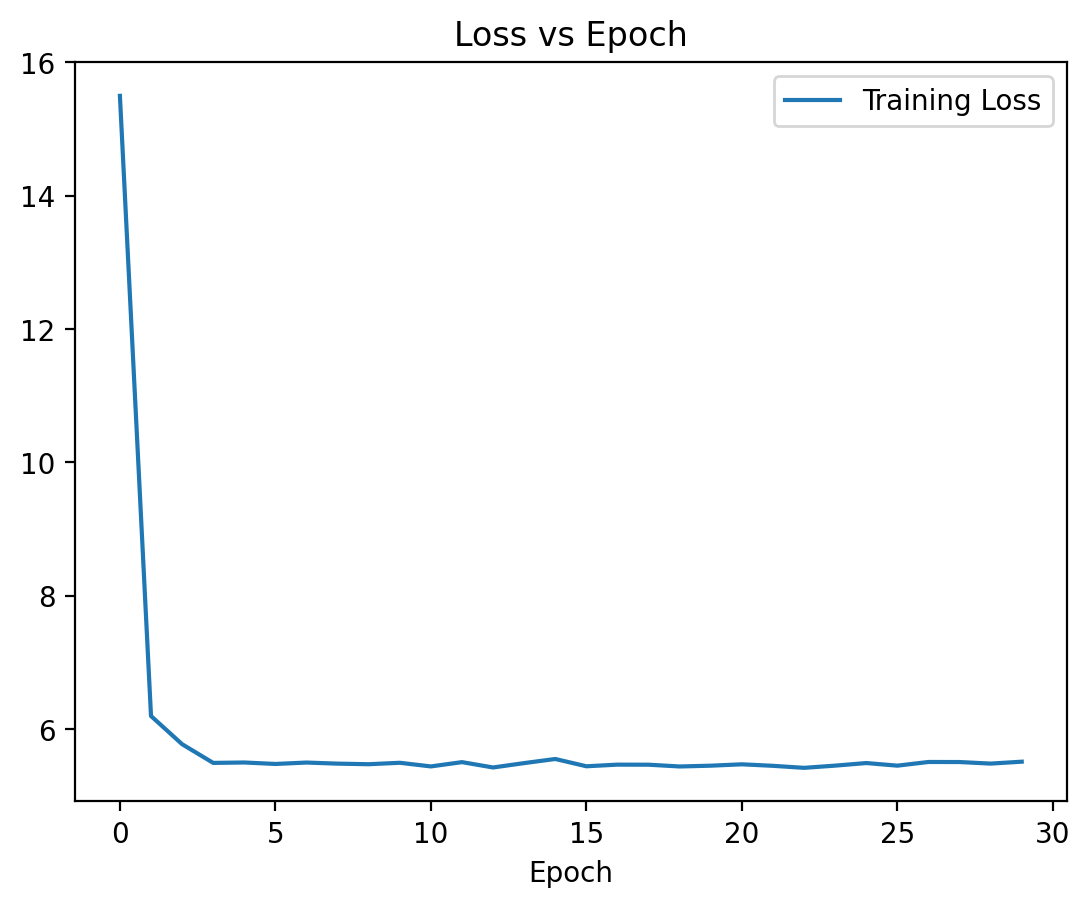

In [58]:
model = Sequential()
model.add(Dense(units=128, use_bias=True, activation = 'relu', input_shape=(n_cols,)))
model.add(Dropout(.2))
model.add(Dense(64, use_bias=True))
model.add(Dropout(.2))
model.add(Dense(32, use_bias=True))
model.add(Dropout(.2))
model.add(Dense(1, use_bias=True))
start_time = time.time()
model.compile(optimizer=Adamax(learning_rate=.1), loss='mean_squared_error')
history = model.fit(X_train, y_train,
                   epochs=30,
                   verbose=1,
                   batch_size=50)
end_time=time.time()
print(f"Running time", end_time - start_time)
train_r2 = metrics.r2_score(y_train, model.predict(X_train, verbose=0))
test_r2 = metrics.r2_score(y_test, model.predict(X_test, verbose=0))
print("Train r2", train_r2)
print("Test r2", test_r2)
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.title(f'Loss vs Epoch')
plt.legend()
plt.show()
appr_2 = pd.DataFrame([{'Model_specs': 'Approach 2 - More dense hidden layers with dropout',
                               'iteration':i+1,
                               'train_r2': train_r2,
                               'test_r2': test_r2,
                               'elapsed_time':end_time - start_time,
                               'timestamp':end_time}])
final_results_df = pd.concat([final_results_df, appr_2], ignore_index = True)

In [59]:
final_results_df.sort_values("timestamp", ascending=False).head(6)

,Model_specs,iteration,train_r2,test_r2,elapsed_time,timestamp
25,Approach 2 - More dense hidden layers with dro...,3,0.607359,0.608424,95.666990,1.715141e+09
24,Approach 1 - Different activation function wit...,3,0.608066,0.608592,262.635817,1.715141e+09
23,NN 2 hidden 10 neuron each relu activation 20 ...,3,0.635296,0.635114,262.633525,1.715140e+09
22,NN 2 hidden 10 neuron each relu activation 20 ...,2,0.631412,0.631792,262.560235,1.715140e+09
21,NN 2 hidden 10 neuron each relu activation 20 ...,1,0.630258,0.630055,262.682091,1.715140e+09
20,NN 2 hidden 10 neuron each no activation 20 ep...,3,0.600265,0.599701,82.699931,1.715140e+09



High training time.

Still performance did not improve.

Final aggregated results:

In [62]:
agg_grouped_results = final_results_df.groupby('Model_specs').mean()

In [63]:
agg_grouped_results

,iteration,train_r2,test_r2,elapsed_time,timestamp
Model_specs,,,,,
Approach 1 - Different activation function with dropout with Adamax,3.0,0.608066,0.608592,262.635817,1.715141e+09
Approach 2 - More dense hidden layers with dropout,3.0,0.607359,0.608424,95.666990,1.715141e+09
NN 2 hidden 10 neuron each no activation 20 epoch 32 batch size,2.0,0.602831,0.602303,82.697242,1.715140e+09
NN 2 hidden 10 neuron each no activation 20 epoch 512 batch size,2.0,0.555296,0.554971,9.380167,1.715139e+09
NN 2 hidden 10 neuron each no activation 20 epoch default batch size,2.0,0.604653,0.603916,77.085374,1.715139e+09
NN 2 hidden 10 neuron each no activation function,2.0,0.603287,0.602831,37.502592,1.715138e+09
NN 2 hidden 10 neuron each relu activation 20 epoch 10 batch size,2.0,0.632322,0.632320,262.625284,1.715140e+09
NN 2 hidden 10 neuron each relu activation 20 epoch 32 batch size,2.0,0.627461,0.627602,76.416902,1.715139e+09
NN 2 hidden 10 neuron each relu activation 20 epoch 512 batch size,2.0,0.592083,0.591847,9.179799,1.715139e+09


Neural Network with 2 hidden layers, each having 10 neuron with a relu activation function, 20 epochs with a batch size of 10 is the best model, having highest r2 score on test.